# Employee Salary Data

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import bootstrap

#train test split the data using sklearn
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split

#Import libraries to implement linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#cross validation
from sklearn.model_selection import cross_val_score

#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#import Bagging and DT
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [3]:
df = pd.read_csv('Data/salary_data.csv')

In [4]:
df.describe()

YearsExperience        Age        Salary
count        30.000000  30.000000  3.000000e+01
mean          5.313333  27.216667  9.120360e+05
std           2.837888   5.161267  3.289732e+05
min           1.100000  21.000000  4.527720e+05
25%           3.200000  23.300000  6.806490e+05
50%           4.700000  25.000000  7.828440e+05
75%           7.700000  30.750000  1.206537e+06
max          10.500000  38.000000  1.468692e+06

In [5]:
df.head()

YearsExperience   Age  Salary
0              1.1  21.0  472116
1              1.3  21.5  554460
2              1.5  21.7  452772
3              2.0  22.0  522300
4              2.2  22.2  478692

In [6]:
X = df.drop(columns=['Salary'])
y = df['Salary']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# EDA Analysis

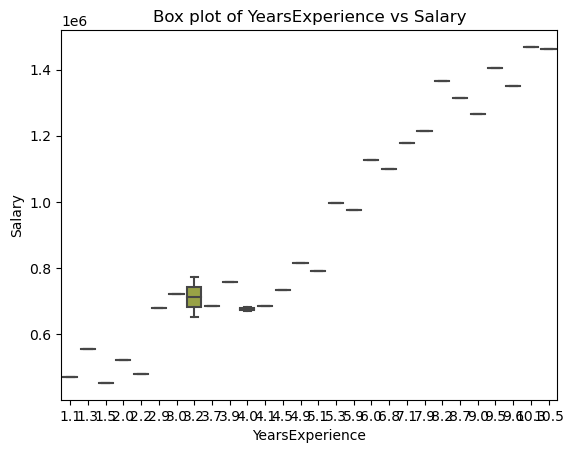

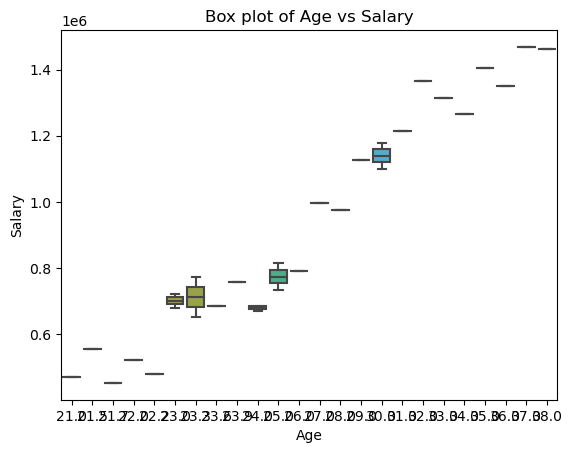

In [7]:
for column in df.columns[:-1]:
    sns.boxplot(x=df[column], y=df['Salary'])
    plt.xlabel(column)
    plt.ylabel('Salary')
    plt.title(f'Box plot of {column} vs Salary')
    plt.show()

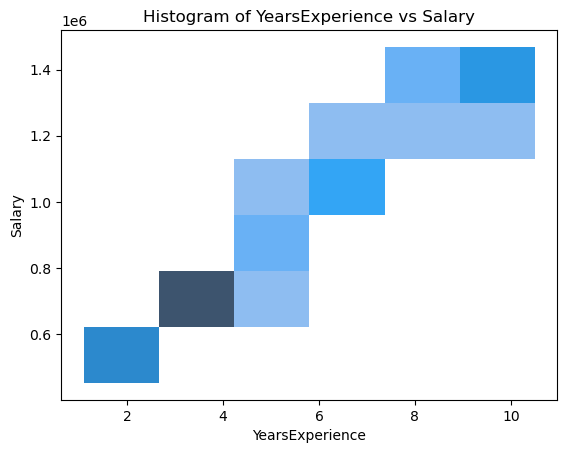

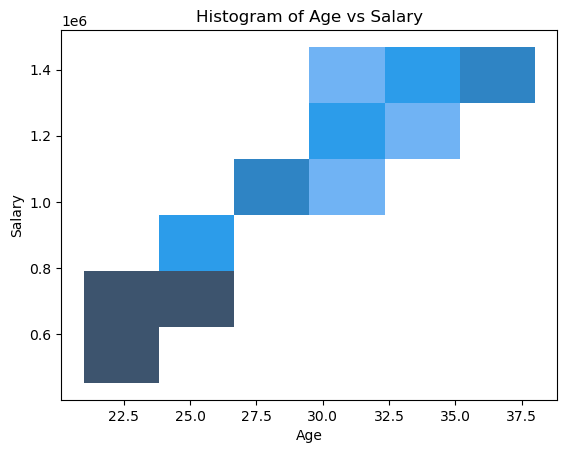

In [8]:
for column in df.columns[:-1]:
    sns.histplot(x=df[column], y=df['Salary'])
    plt.xlabel(column)
    plt.ylabel('Salary')
    plt.title(f'Histogram of {column} vs Salary')
    plt.show()

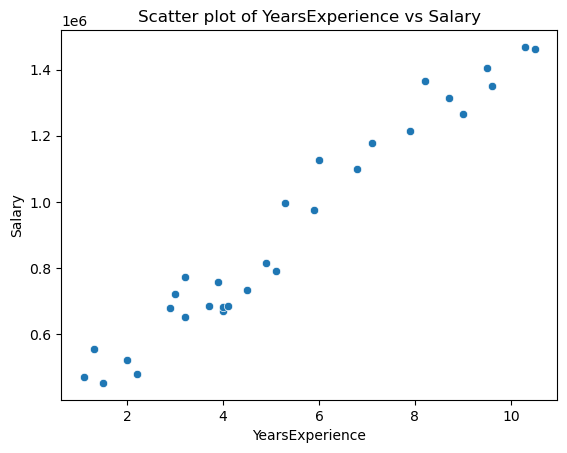

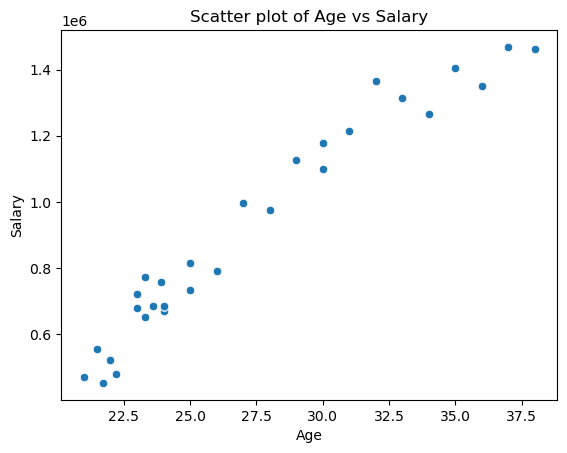

In [9]:
for column in df.columns[:-1]:
    sns.scatterplot(x=df[column], y=df['Salary'])
    plt.xlabel(column)
    plt.ylabel('Salary')
    plt.title(f'Scatter plot of {column} vs Salary')
    plt.show()

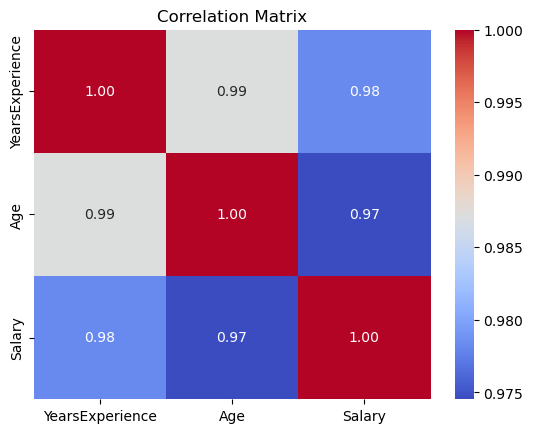

In [10]:
#Correlation Matrix

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [11]:
print(df.isnull().sum())

YearsExperience    0
Age                0
Salary             0
dtype: int64


# Linear Regression

In [12]:
#Standard Scaling for the Data

from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
X_std = scaler.fit_transform(X)

In [13]:
#Build a Data Model
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 8443322166.81
R-squared: 0.89


# Random Forest

In [15]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

model = RandomForestRegressor()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [16]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

In [17]:
grid_search.fit(X_train, y_train)

C:\Users\ManikantaAleti\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

# Hyper Parameter Tuning

In [18]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [19]:
# Use the best model for predictions
y_pred = best_model.predict(X_test)

In [20]:
#Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared: {r2:.2f}")

Mean Squared Error: 9131109897.19
R-Squared: 0.88


# Decision Tree

In [21]:
#Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared: {r2:.2f}")

Mean Squared Error: 16838609851.17
R-Squared: 0.77


In [23]:
#https://www.geeksforgeeks.org/implementation-of-elastic-net-regression-from-scratch/
print(cross_val_score(regressor, X_train, y_train, cv=5, scoring="r2"))

[0.98251368 0.92790764 0.97460484 0.86255425 0.68828287]


# Removing Outliers

In [24]:
# Assuming 'columns_to_check' is a list of columns where you want to identify outliers
columns_to_check = ['YearsExperience', 'Age', 'Salary']

# Function to remove outliers based on Z-score
def remove_outliers_zscore(df, columns):
    z_scores = stats.zscore(df[columns])
    abs_z_scores = abs(z_scores)
    outliers = (abs_z_scores > 3).all(axis=1)  # Adjust the threshold (3) as needed
    df_no_outliers = df[~outliers]
    return df_no_outliers

# Remove outliers from selected columns
df_no_outliers = remove_outliers_zscore(df, columns_to_check)

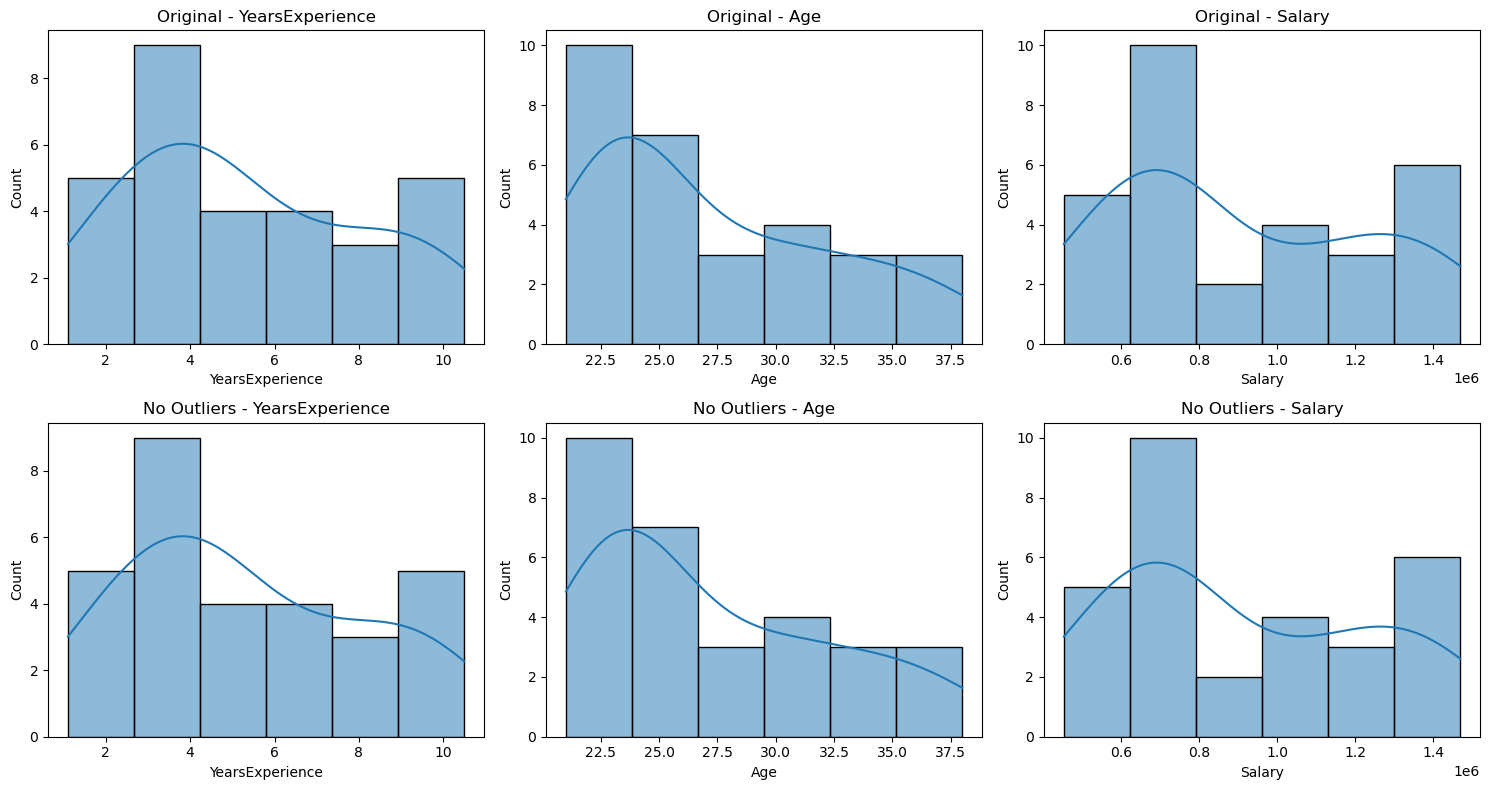

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots to compare distributions before and after removing outliers
fig, axes = plt.subplots(nrows=2, ncols=len(columns_to_check), figsize=(15, 8))

# Plot the original distribution
for i, column in enumerate(columns_to_check):
    sns.histplot(df[column], ax=axes[0, i], kde=True)
    axes[0, i].set_title(f'Original - {column}')

# Plot the distribution after removing outliers
for i, column in enumerate(columns_to_check):
    sns.histplot(df_no_outliers[column], ax=axes[1, i], kde=True)
    axes[1, i].set_title(f'No Outliers - {column}')

plt.tight_layout()
plt.show()

# Save model as pickle file 

In [28]:
import pickle

# Assuming 'model' is your trained machine learning model
model = 'Salary_SalePrice.ipynb'

# Save the model to a file using pickle
with open('Salary_SalePrice.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save model as joblib file

In [29]:
import joblib

# Assuming 'model' is your trained machine learning model
model = 'Salary_SalePrice.ipynb'  # Your machine learning model

# Save the model to a file using joblib
joblib.dump(model, 'Salary_SalePrice.joblib')

['Salary_SalePrice.joblib']

# Bagging ml model

In [30]:
# base_model = RandomForestClassifier()
base_model = DecisionTreeClassifier()  # Replace with your chosen base model
bagging_model = BaggingClassifier(base_model, n_estimators=5, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagged = bagging_model.predict(X_test)

# House Sale Data

In [31]:
df = pd.read_csv('Data/house_price_int_float_no_null.csv')

In [32]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1121.000000  1121.000000  1121.000000    1121.000000  1121.000000   
mean    726.842105    56.146298    70.665477   10122.956289     6.212310   
std     420.769012    41.772684    24.266812    8129.302641     1.380822   
min       1.000000    20.000000    21.000000    1300.000000     2.000000   
25%     364.000000    20.000000    60.000000    7590.000000     5.000000   
50%     725.000000    50.000000    70.000000    9416.000000     6.000000   
75%    1091.000000    70.000000    80.000000   11361.000000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1121.000000  1121.000000   1121.000000  1121.000000  1121.000000  ...   
mean      5.561106  1972.264942   1985.683318   108.487957   438.399643  ...   
std       1.068236    30.967730     21.025974   189.500966   468.385038  ...   
min       2.000000  1880.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1974.000000   1995.000000     0.000000   374.000000  ...   
75%       6.000000  2003.000000   2005.000000   170.000000   702.000000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1121.000000  1121.000000    1121.000000  1121.000000  1121.000000   
mean     92.610169    46.130241      21.844781     3.348796    16.100803   
std     121.868623    64.390029      61.282083    29.772540    57.801829   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    27.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea      MiscVal       MoSold       YrSold      SalePrice  
count  1121.000000  1121.000000  1121.000000  1121.000000    1121.000000  
mean      2.934880    23.429081     6.339875  2007.795718  185506.152542  
std      40.222087   165.759816     2.687854     1.335043   82999.159004  
min       0.000000     0.000000     1.000000  2006.000000   35311.000000  
25%       0.000000     0.000000     5.000000  2007.000000  131000.000000  
50%       0.000000     0.000000     6.000000  2008.000000  164900.000000  
75%       0.000000     0.000000     8.000000  2009.000000  219500.000000  
max     648.000000  2500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [33]:
df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [34]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# EDA Analysis

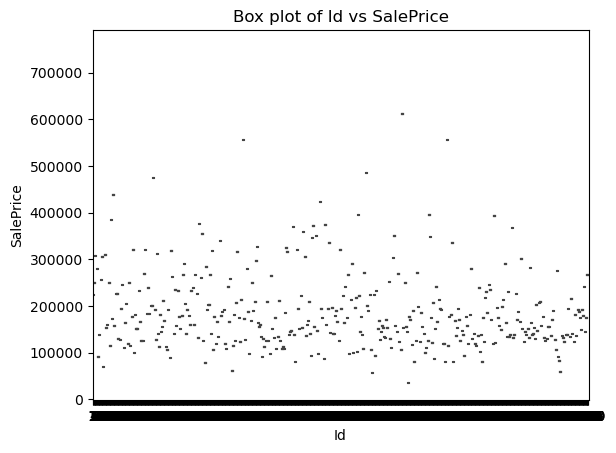

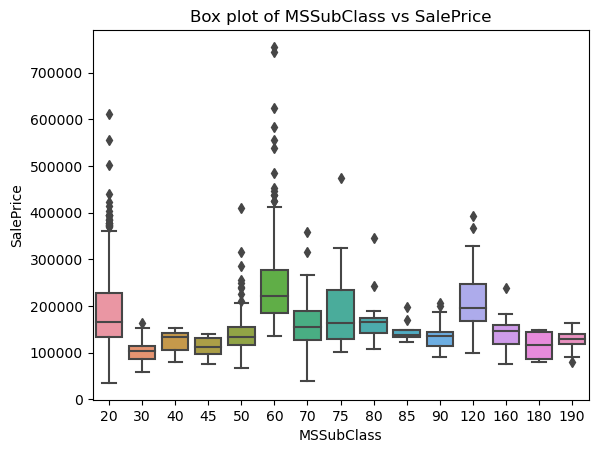

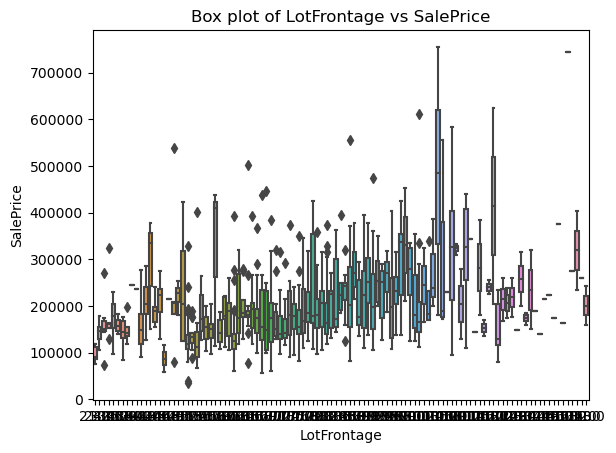

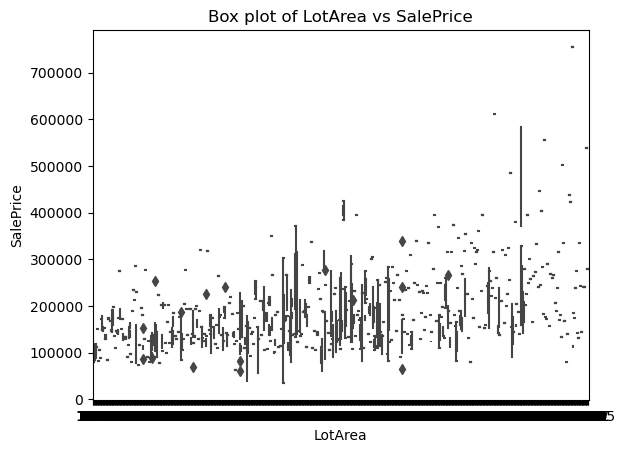

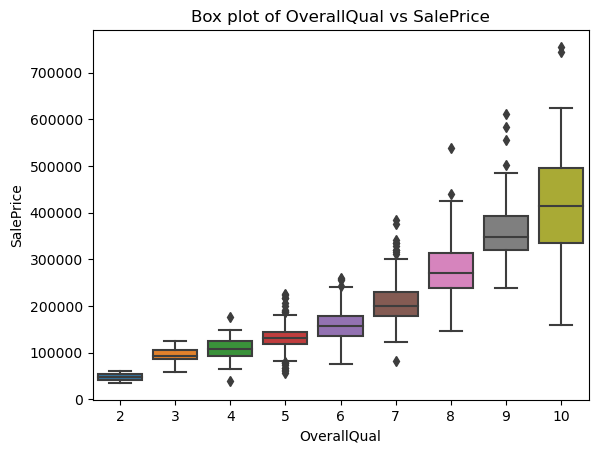

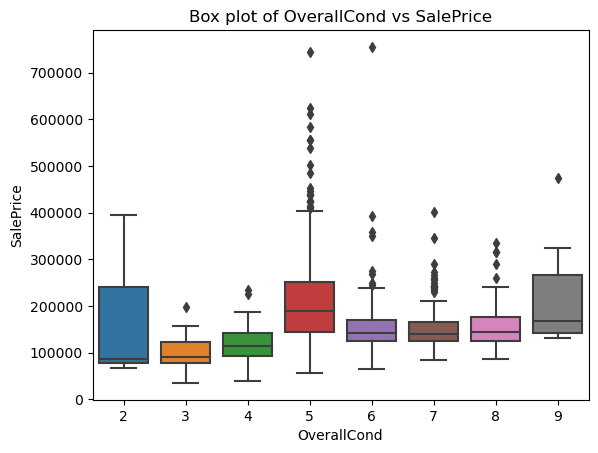

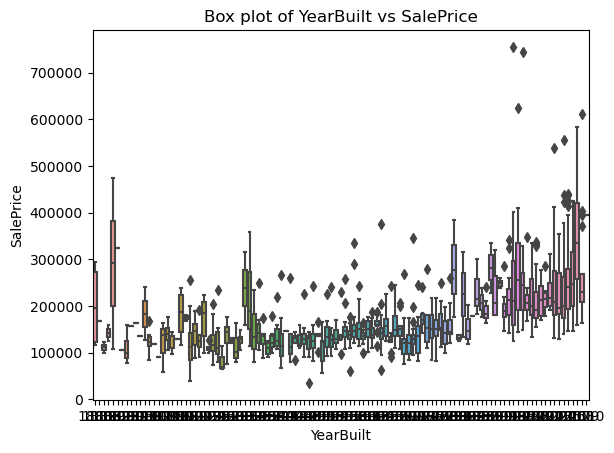

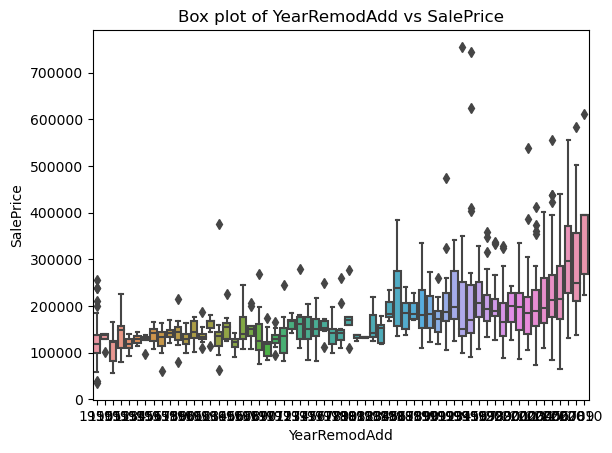

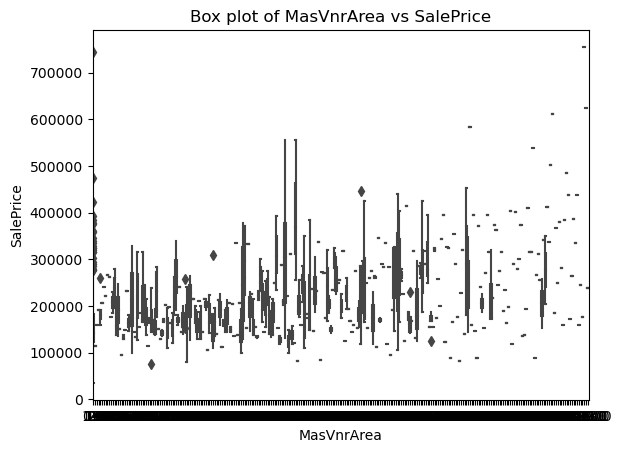

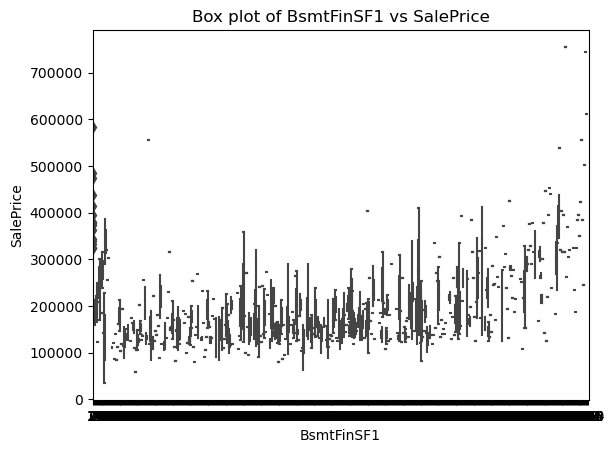

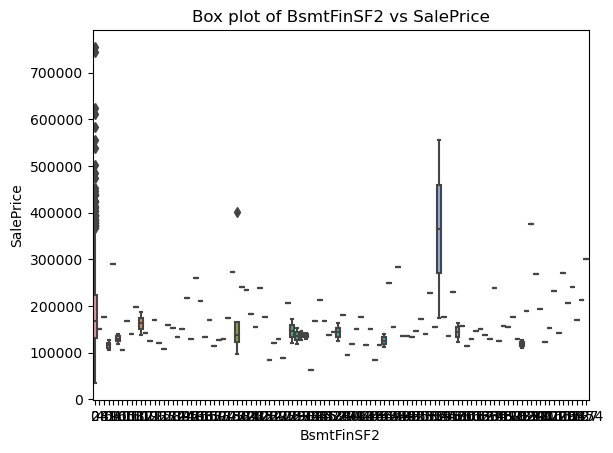

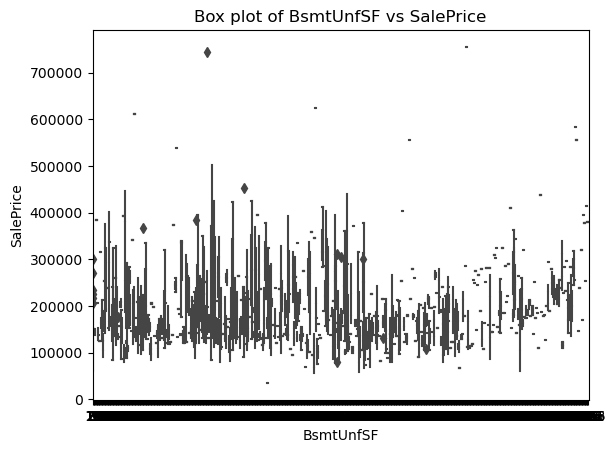

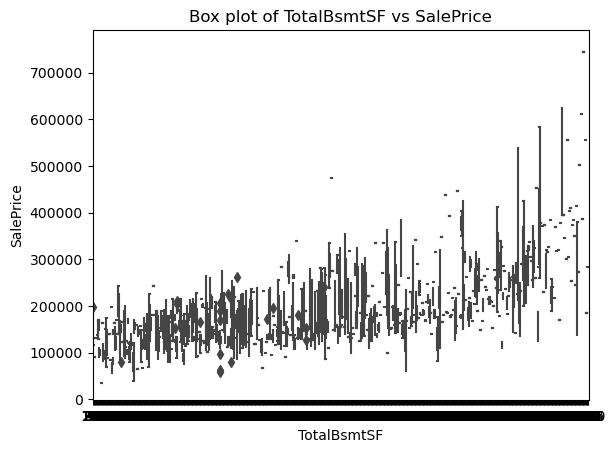

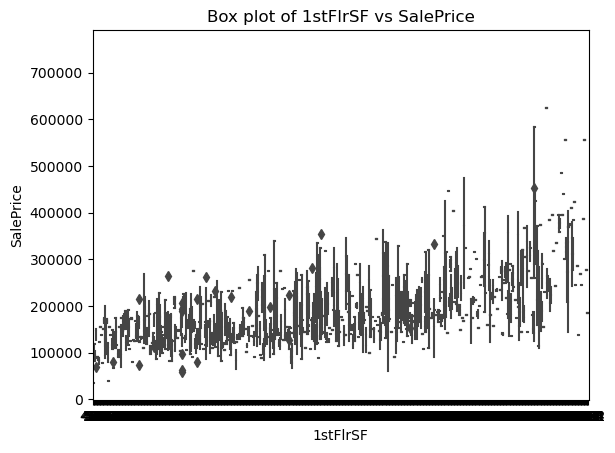

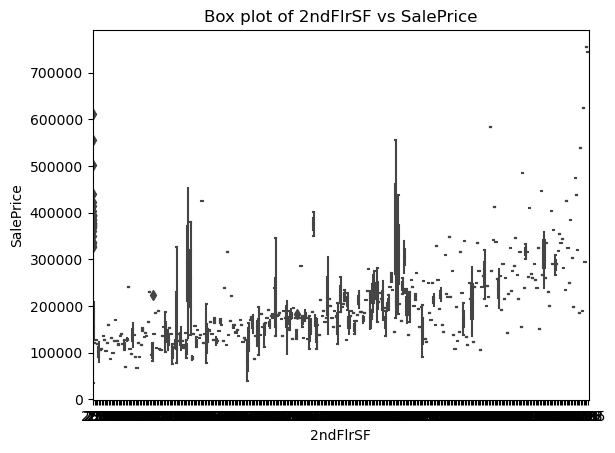

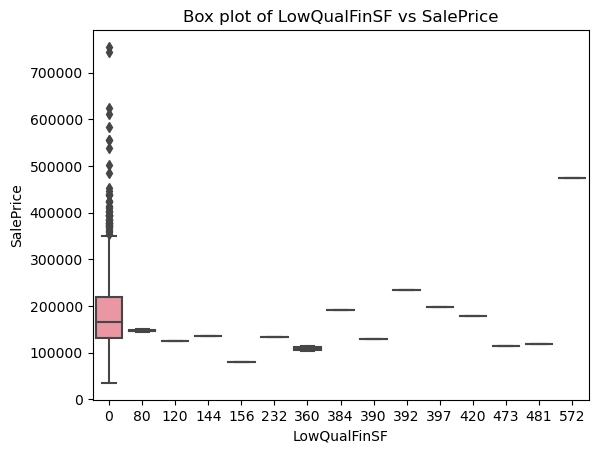

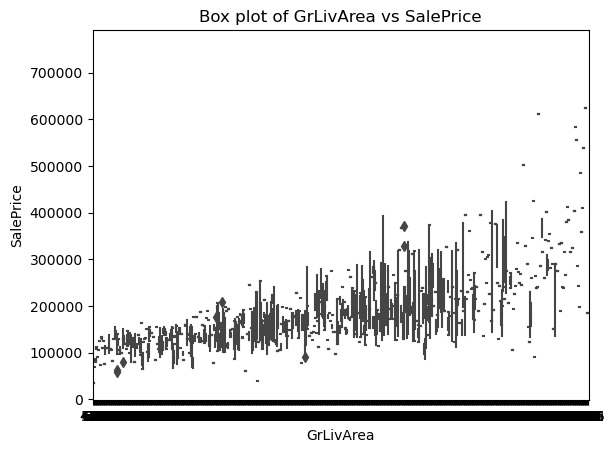

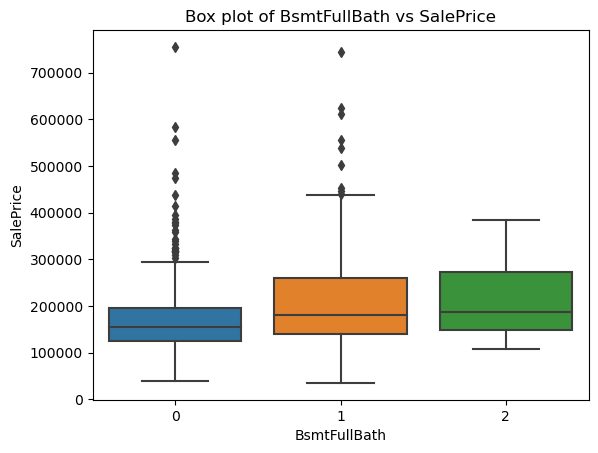

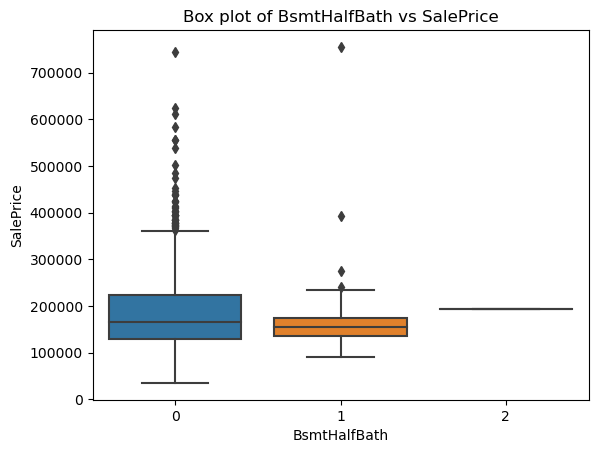

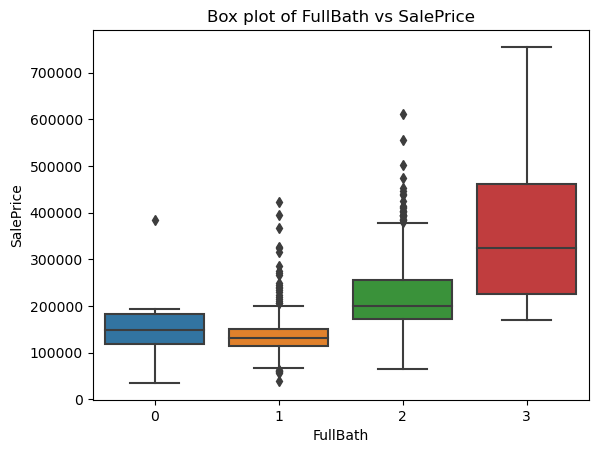

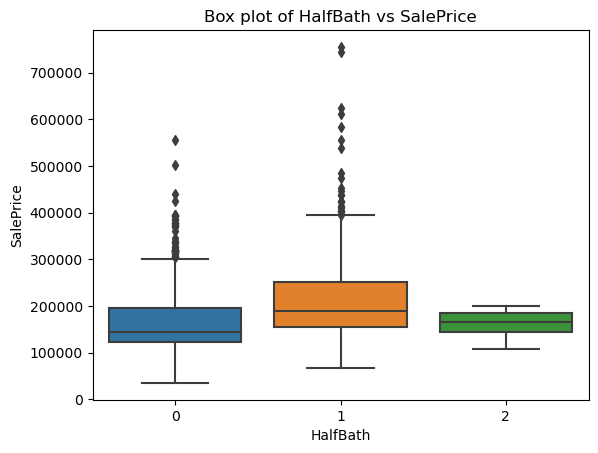

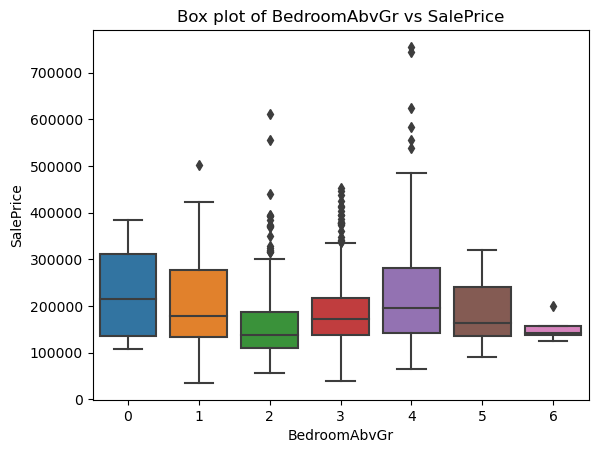

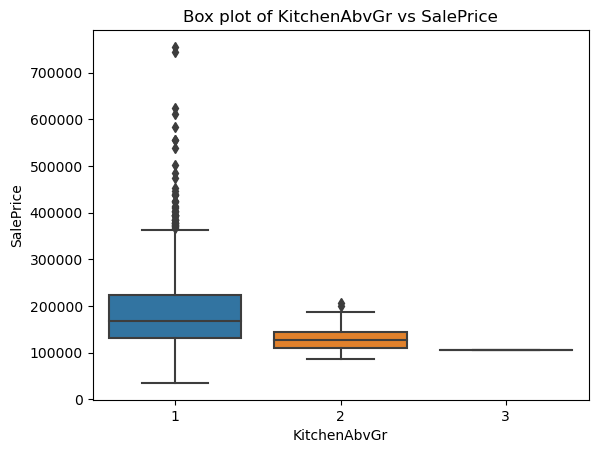

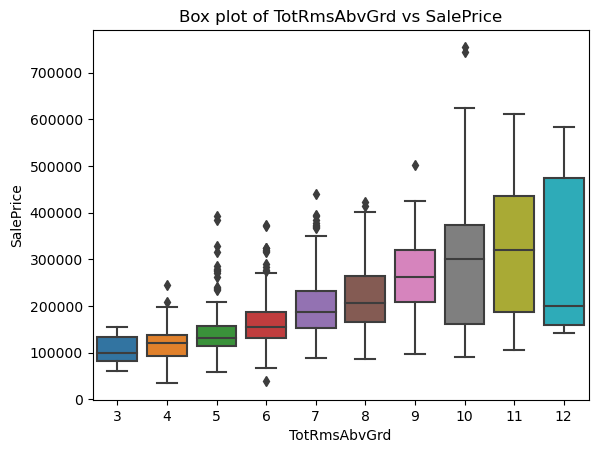

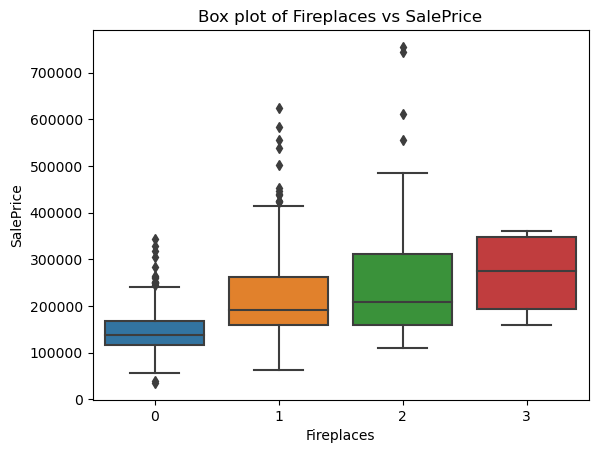

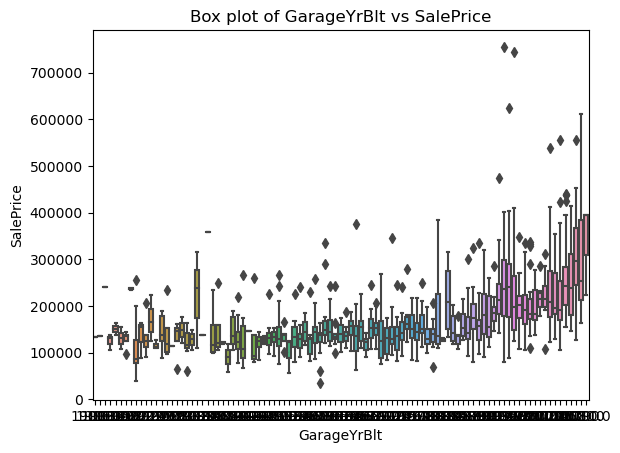

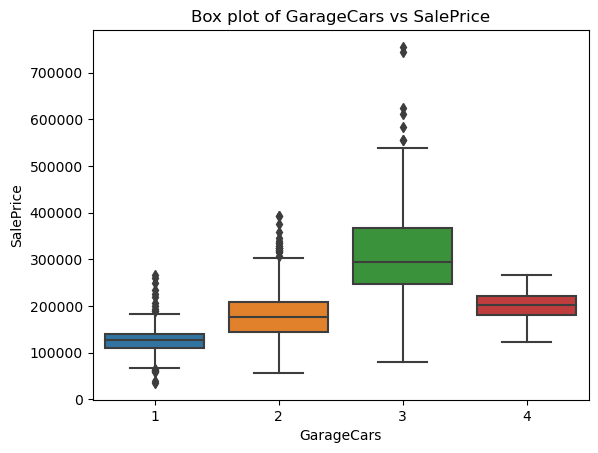

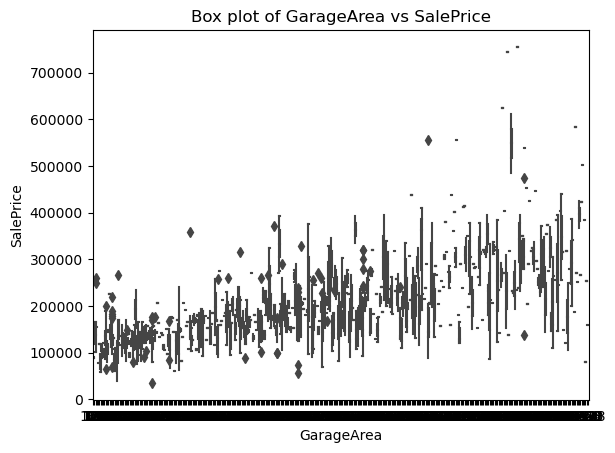

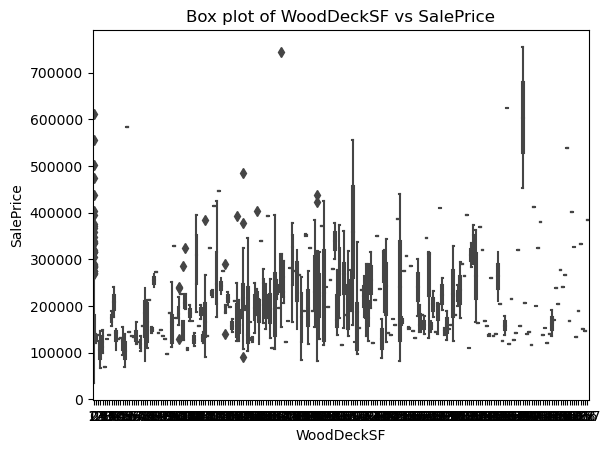

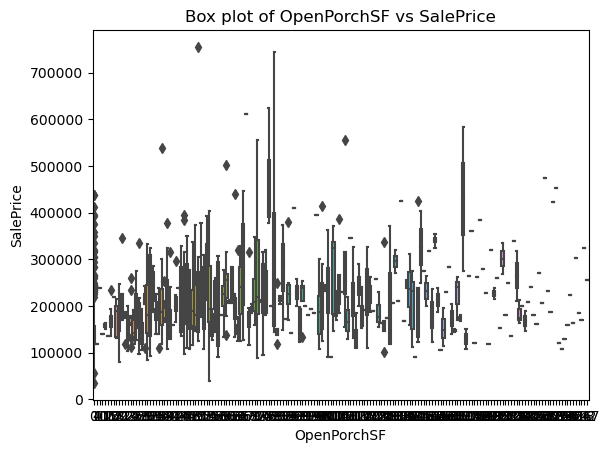

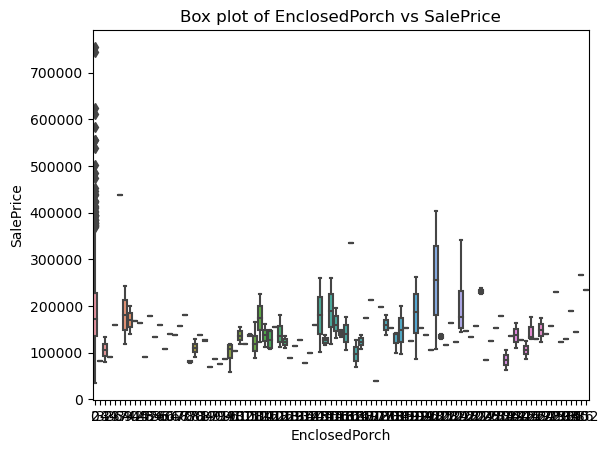

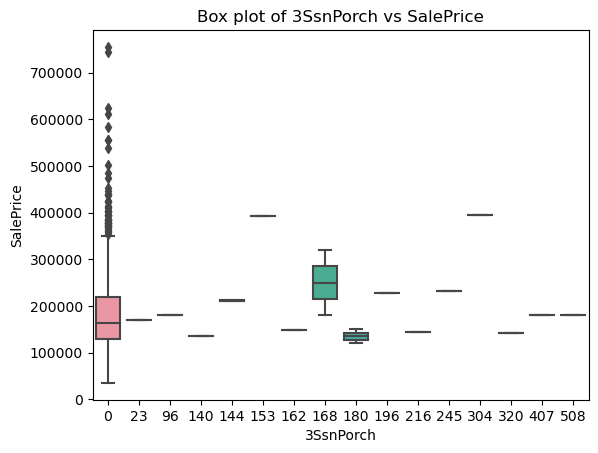

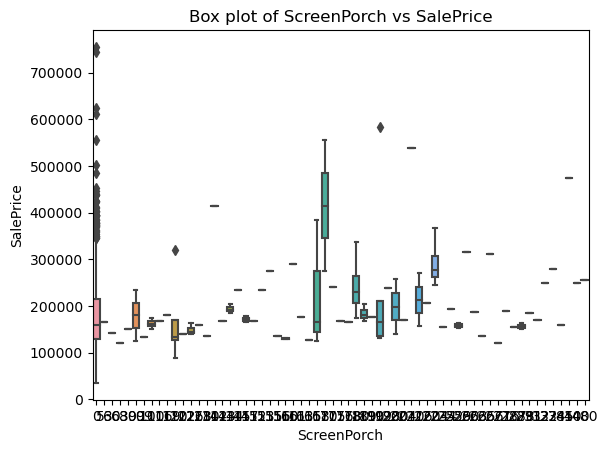

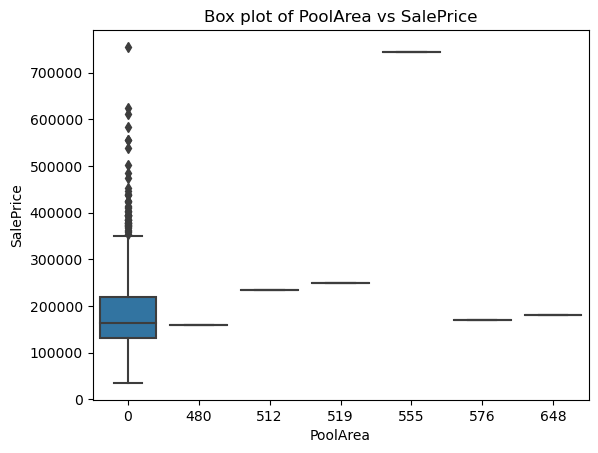

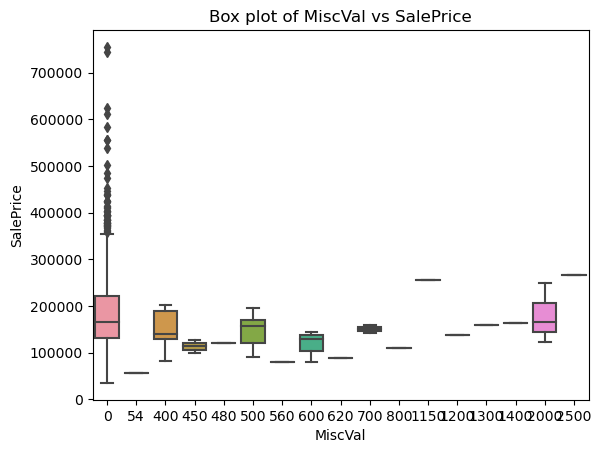

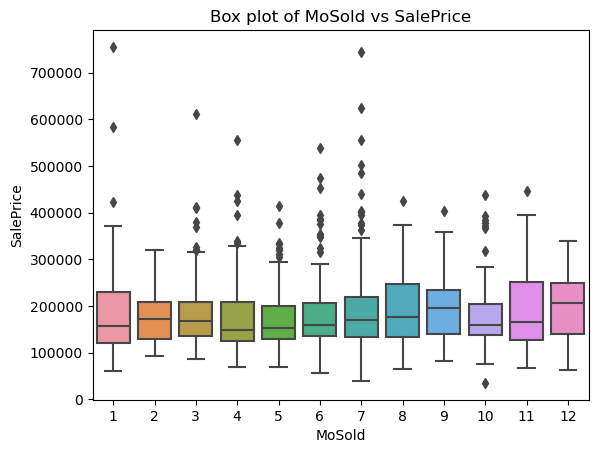

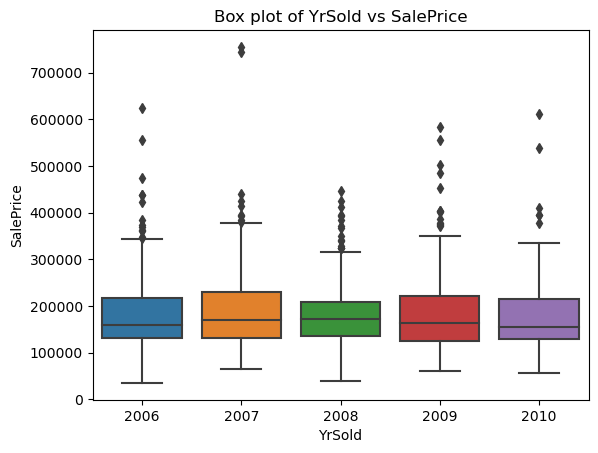

In [35]:
for column in df.columns[:-1]:
    sns.boxplot(x=df[column], y=df['SalePrice'])
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.title(f'Box plot of {column} vs SalePrice')
    plt.show()

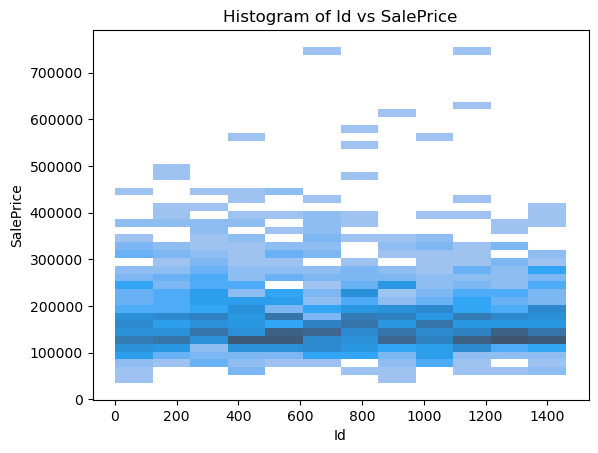

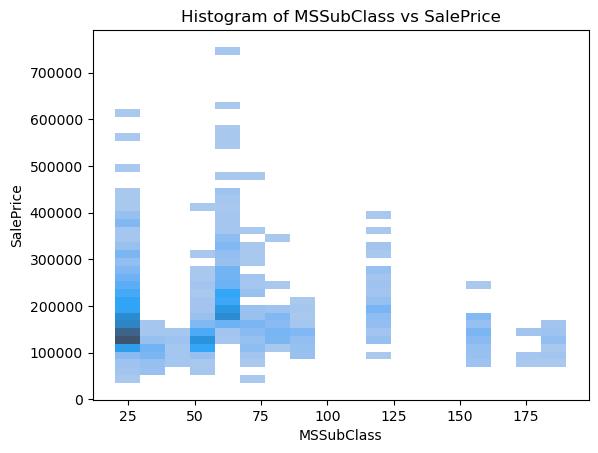

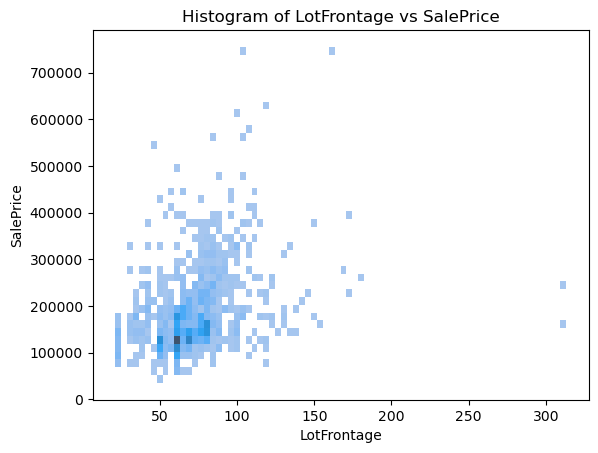

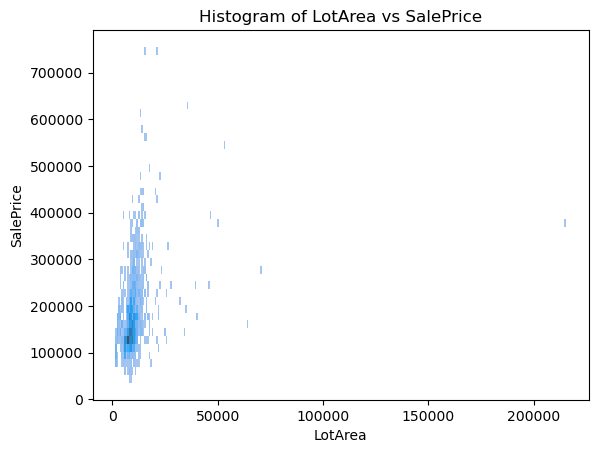

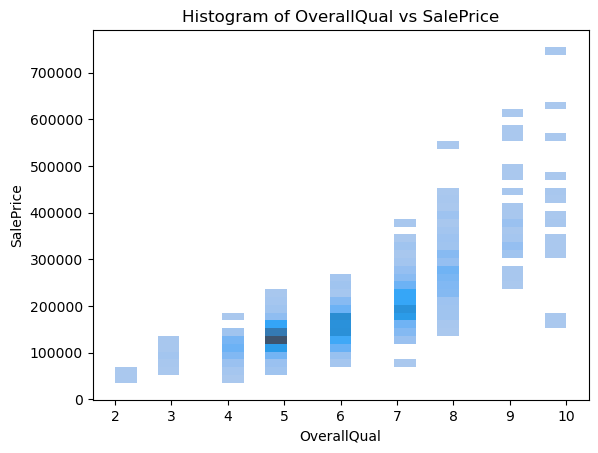

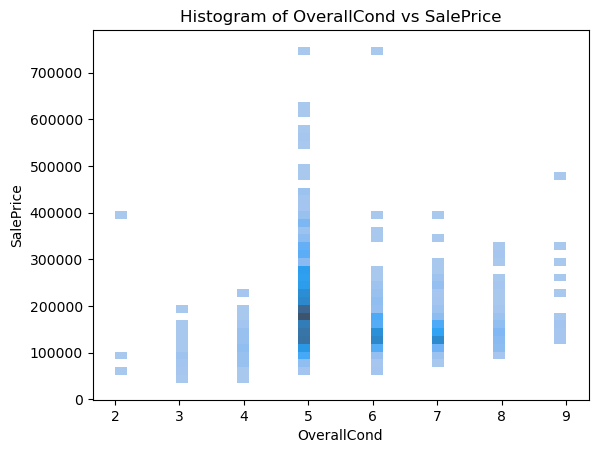

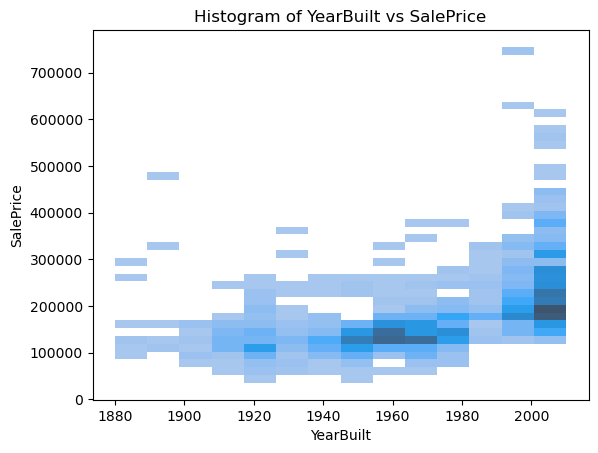

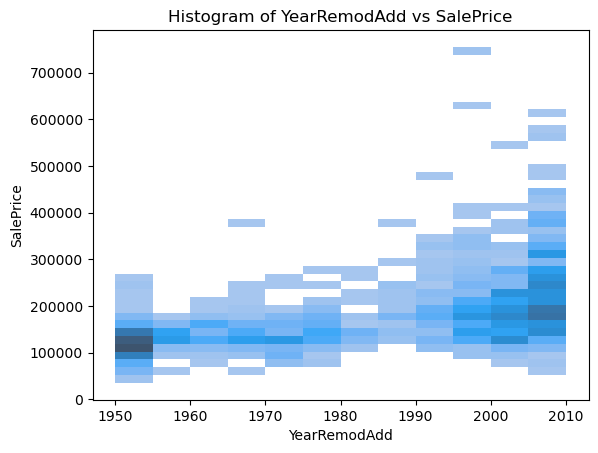

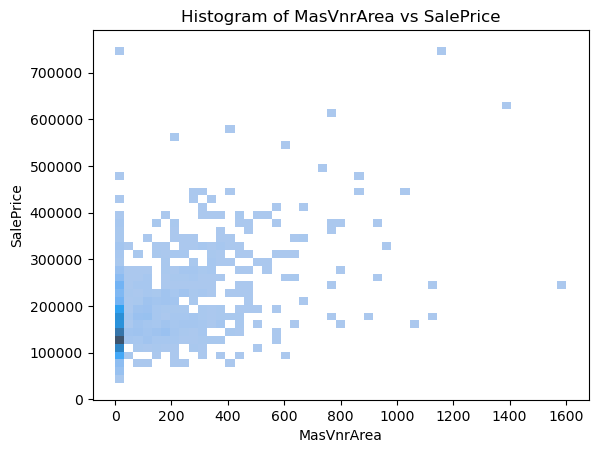

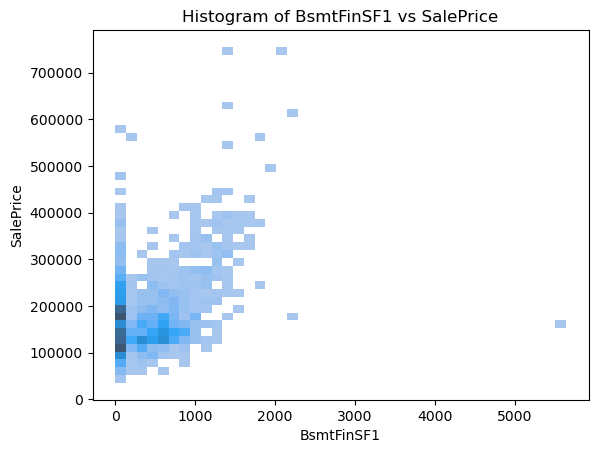

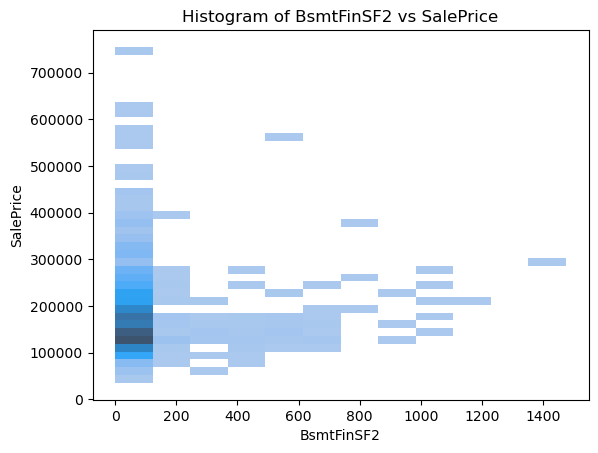

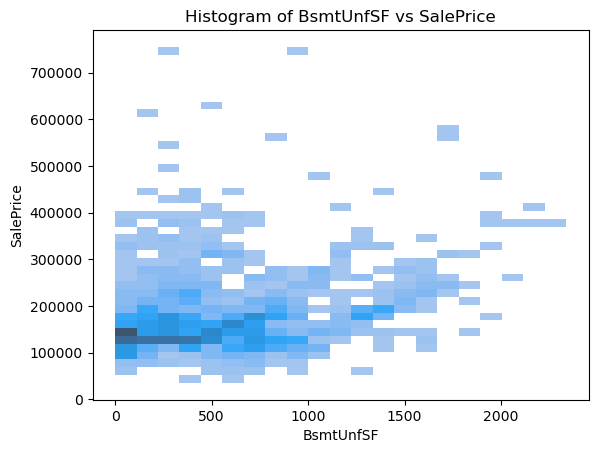

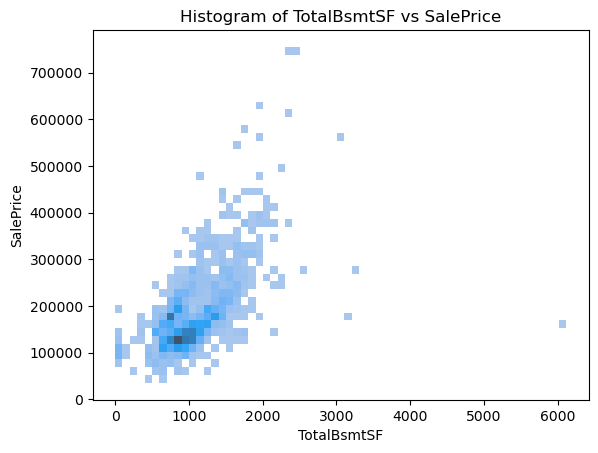

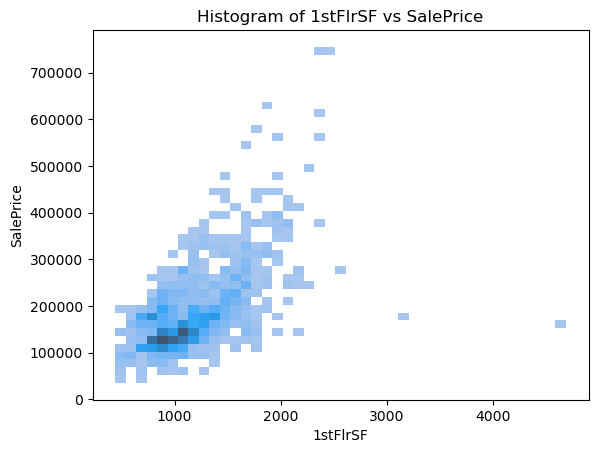

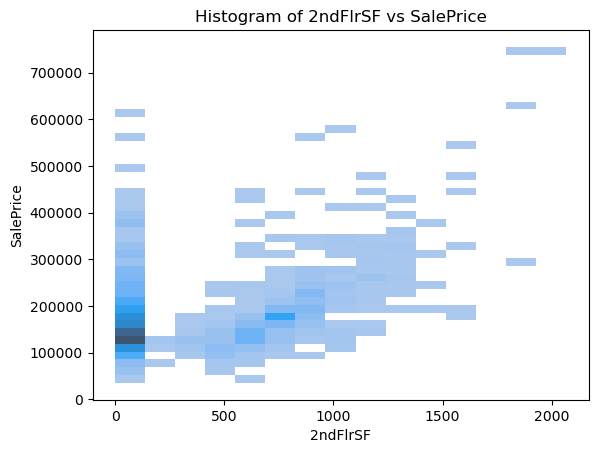

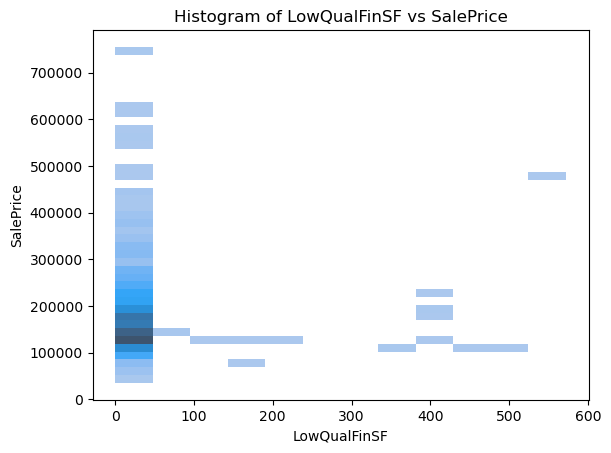

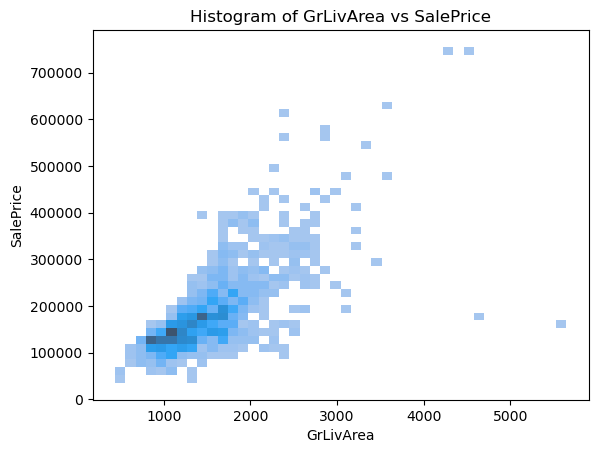

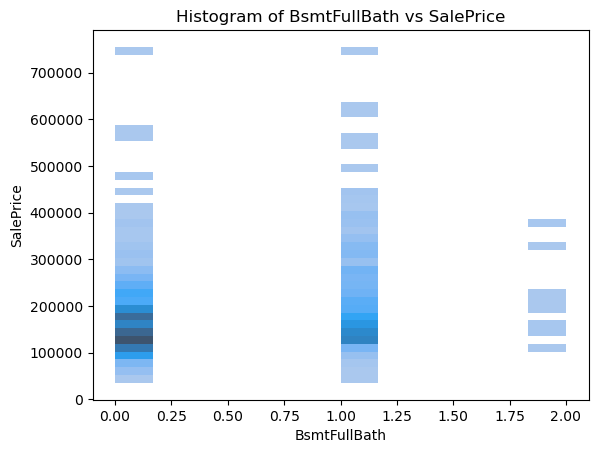

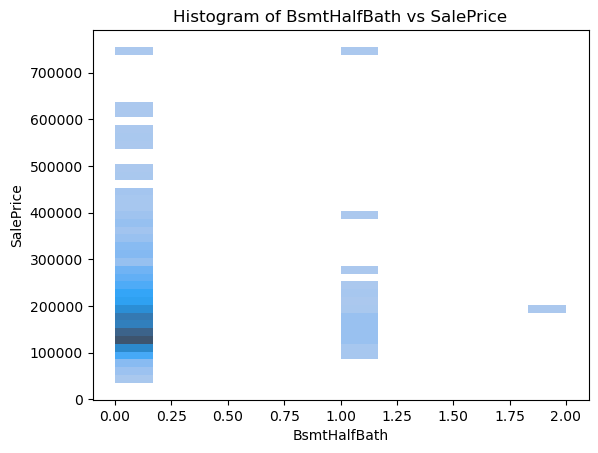

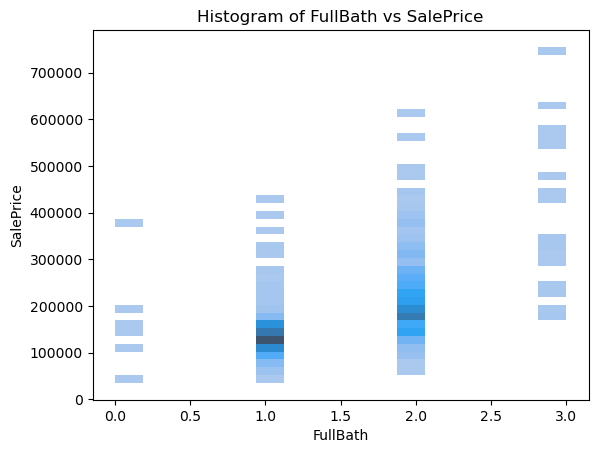

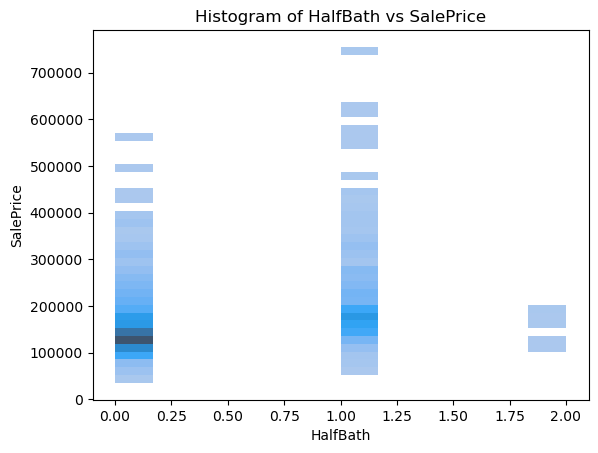

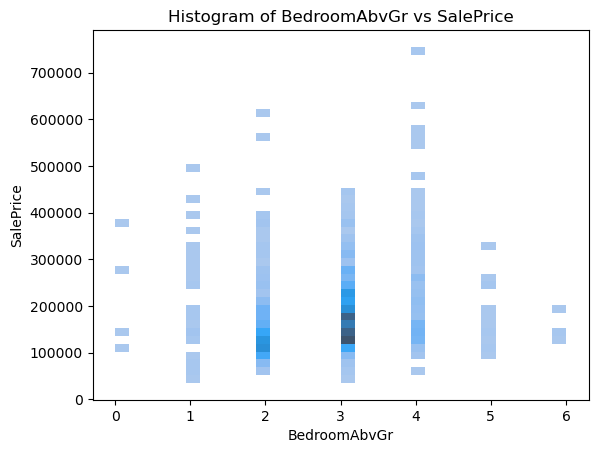

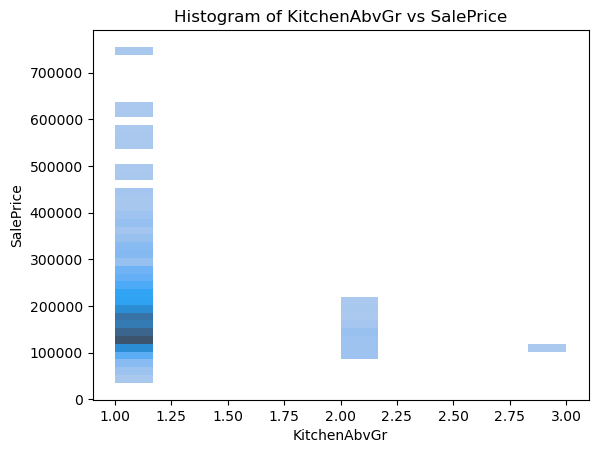

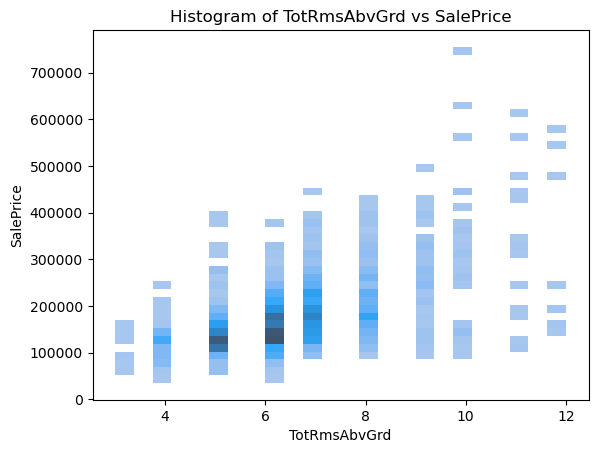

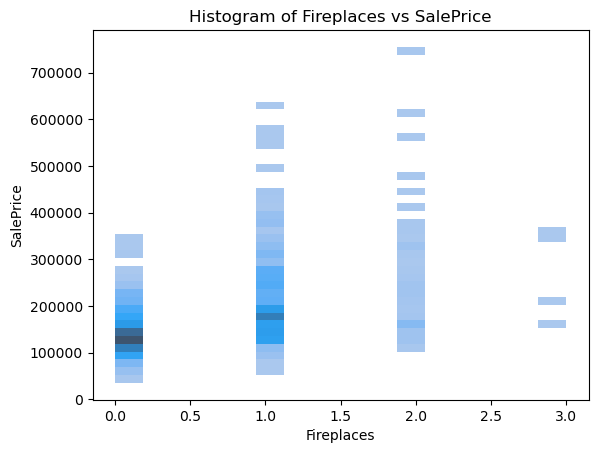

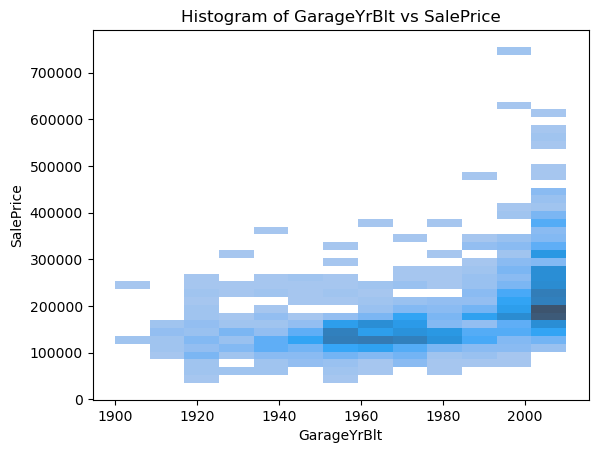

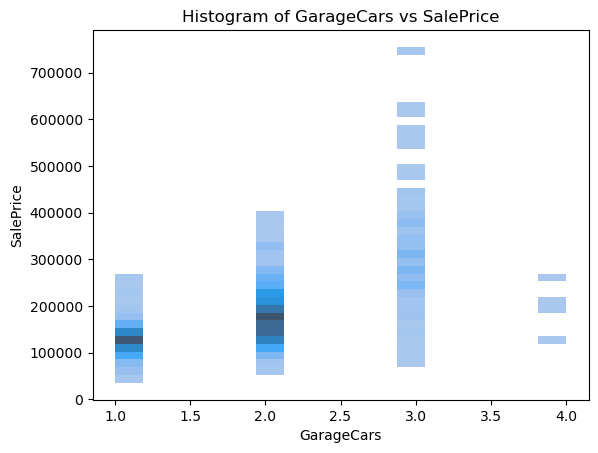

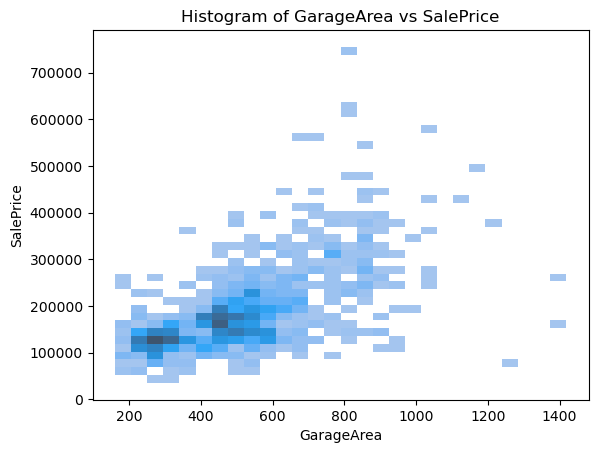

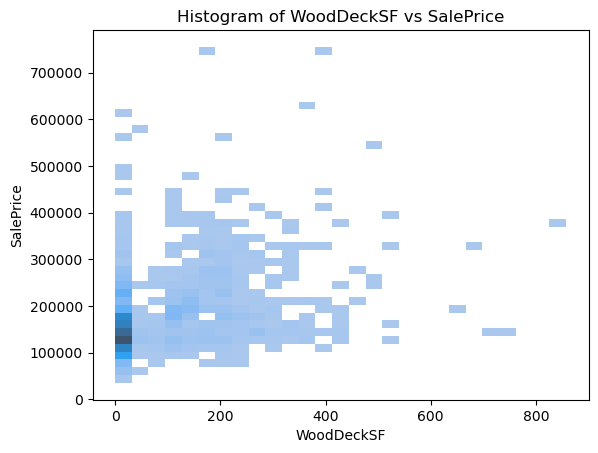

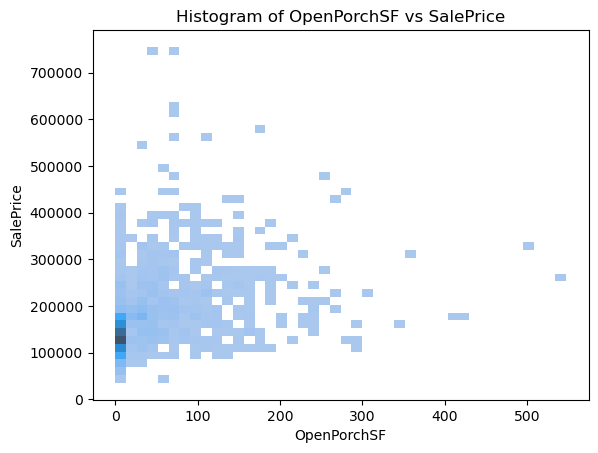

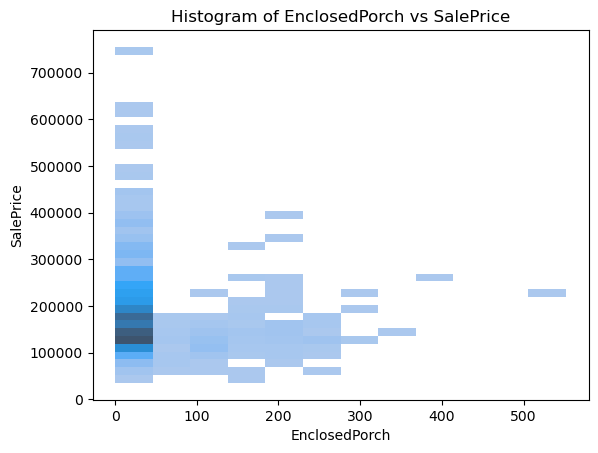

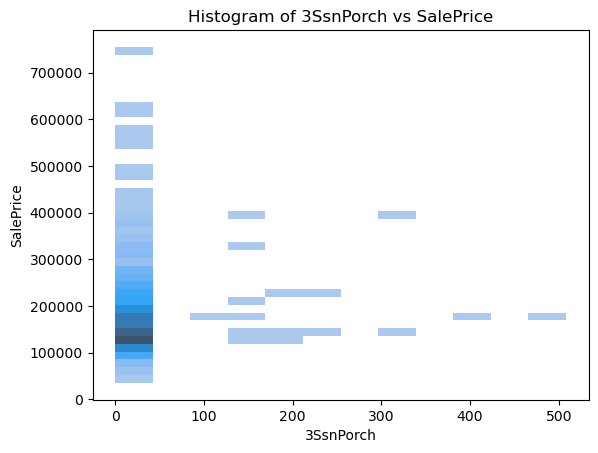

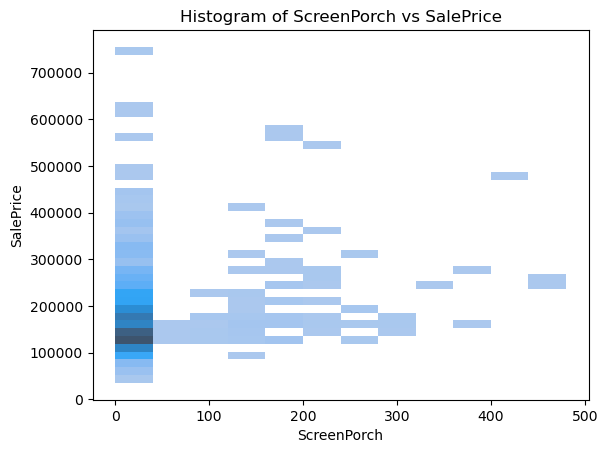

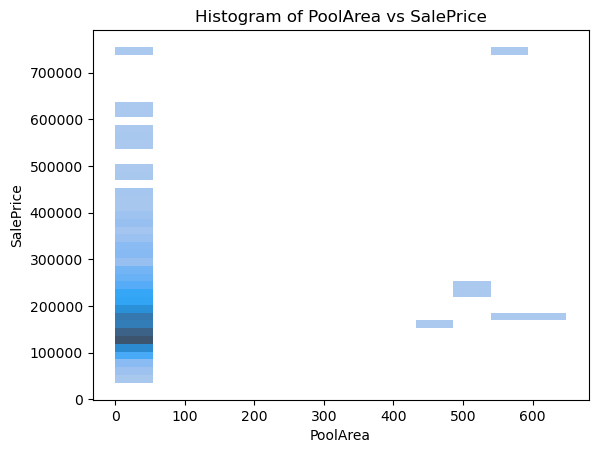

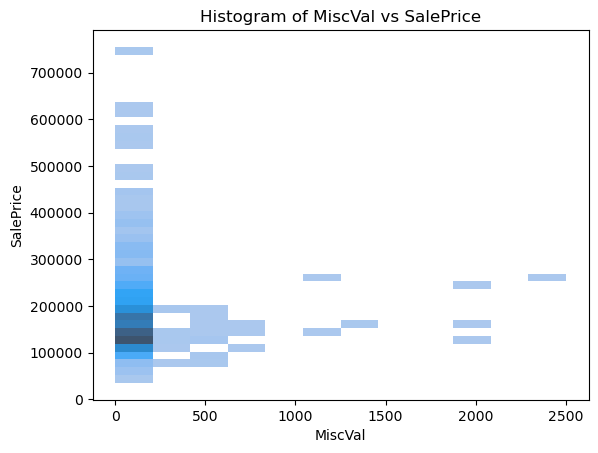

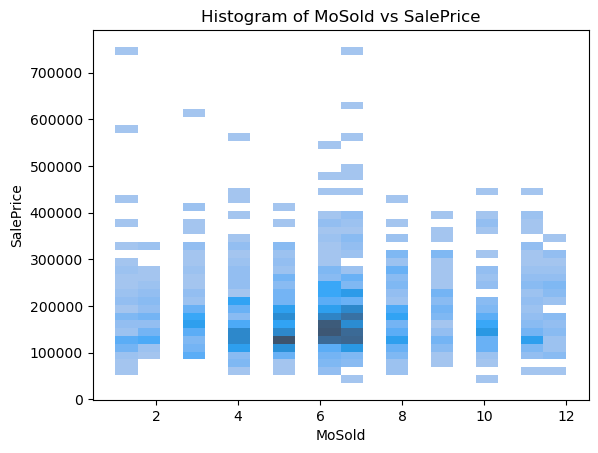

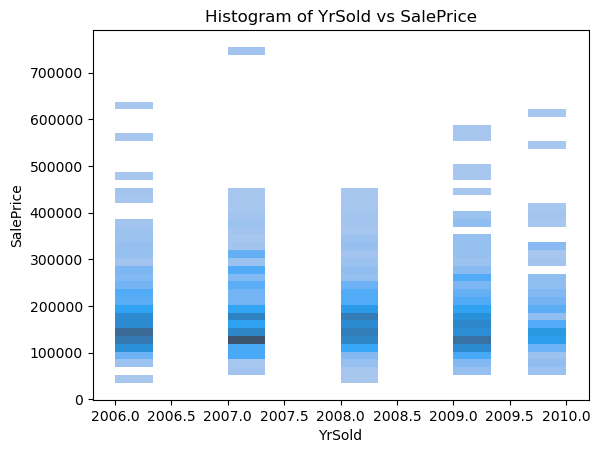

In [36]:
for column in df.columns[:-1]:
    sns.histplot(x=df[column], y=df['SalePrice'])
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.title(f'Histogram of {column} vs SalePrice')
    plt.show()

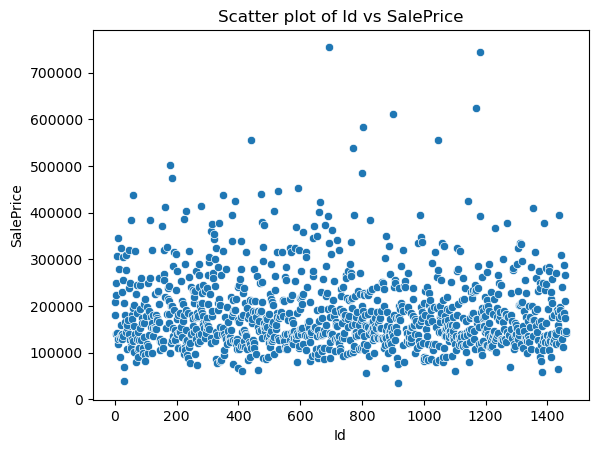

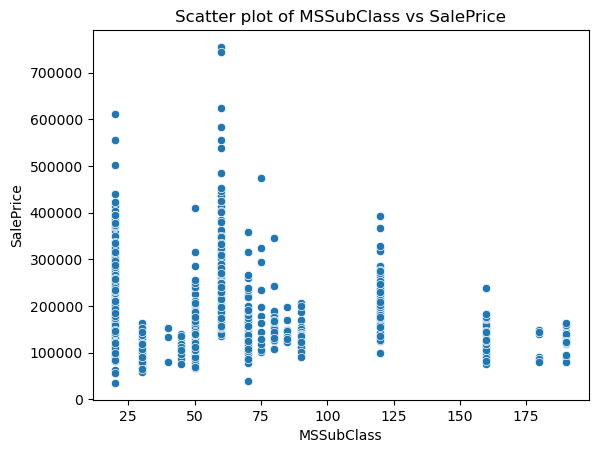

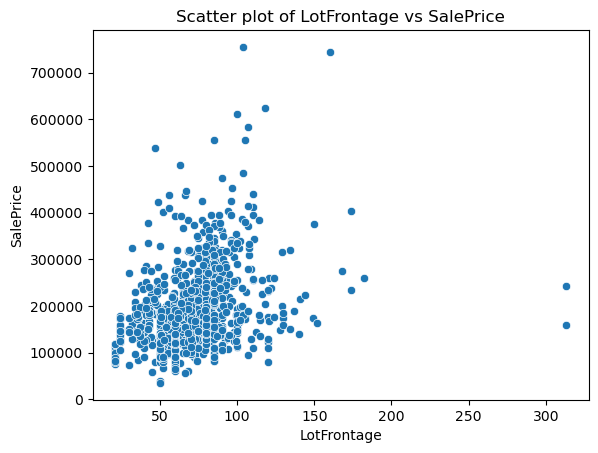

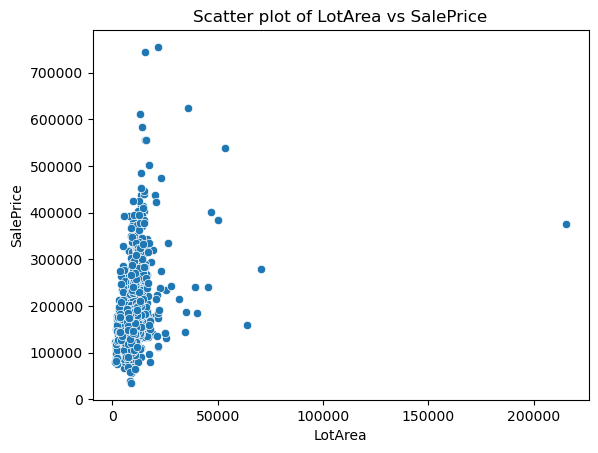

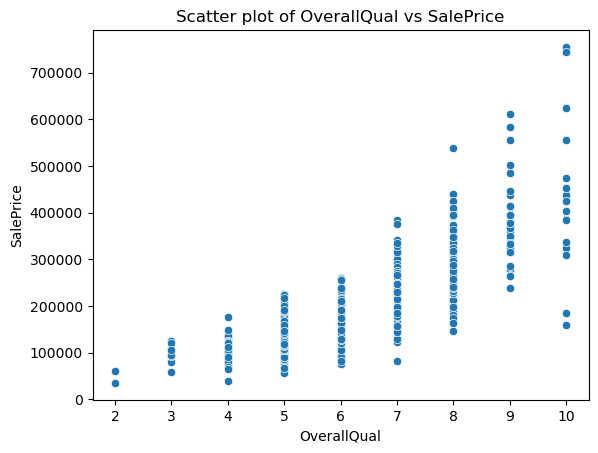

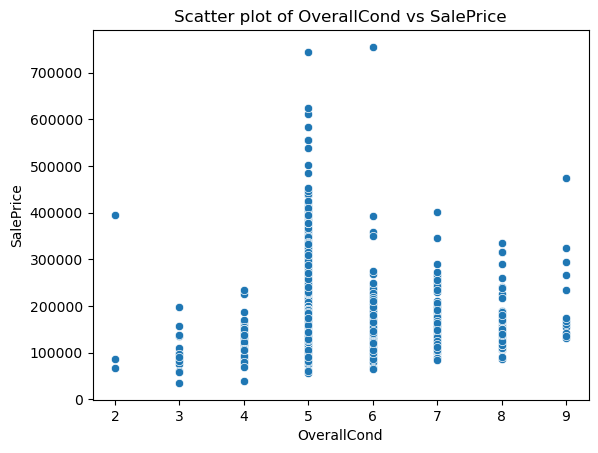

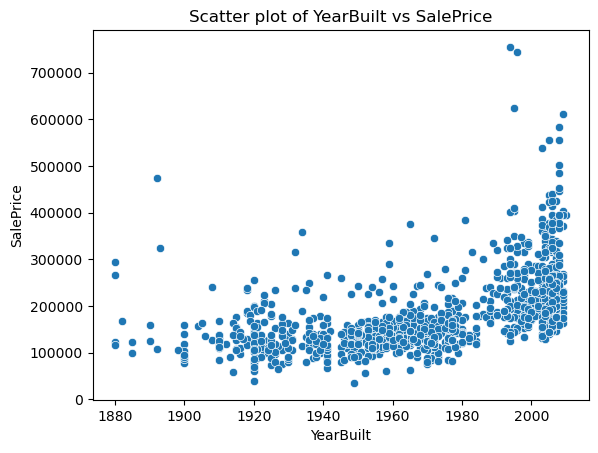

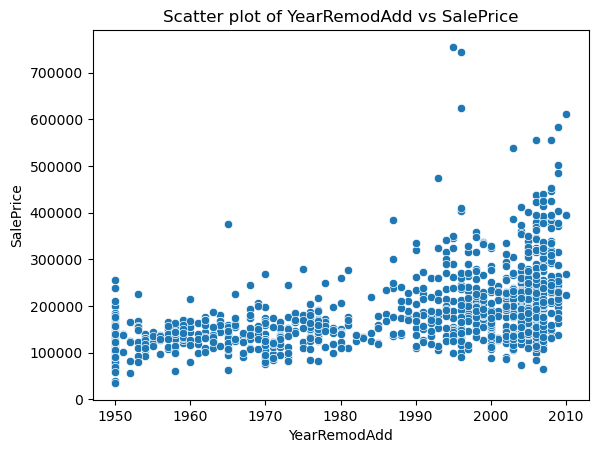

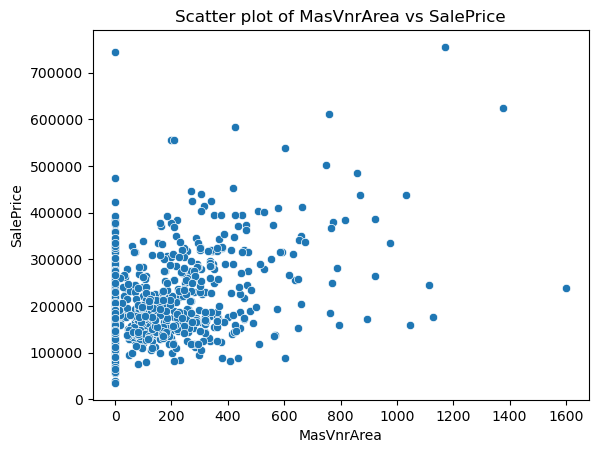

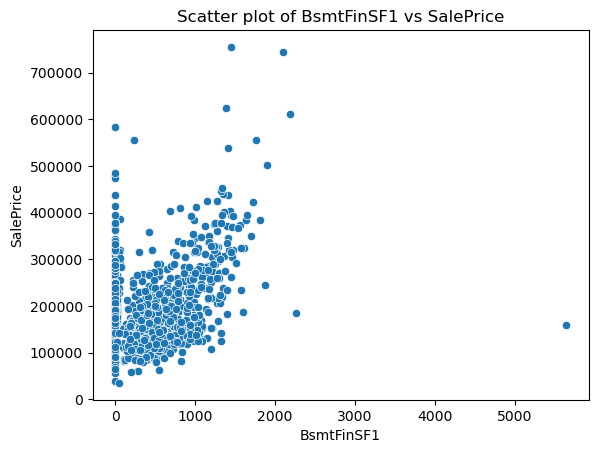

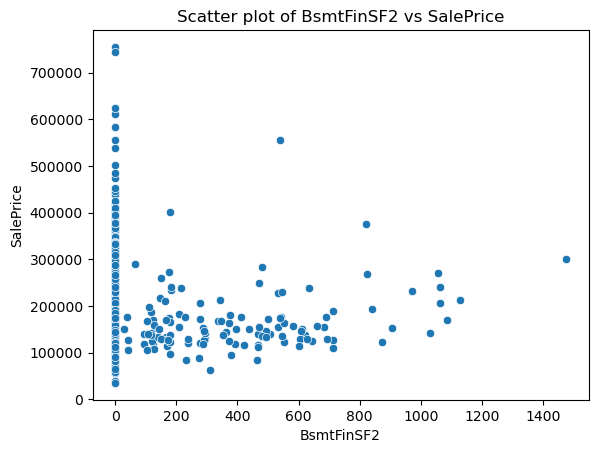

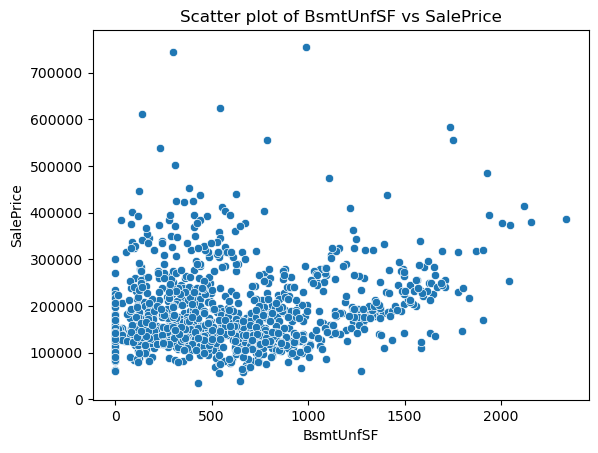

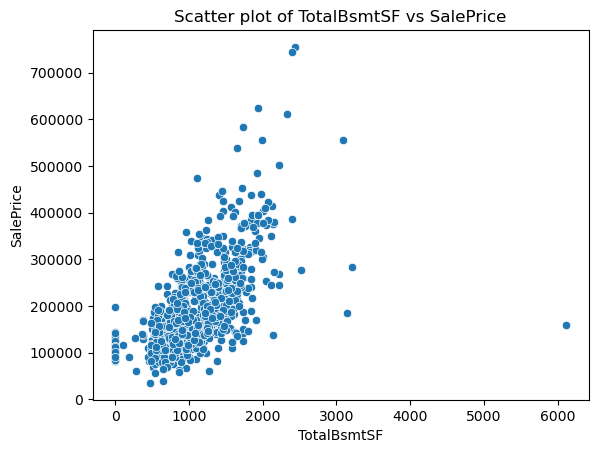

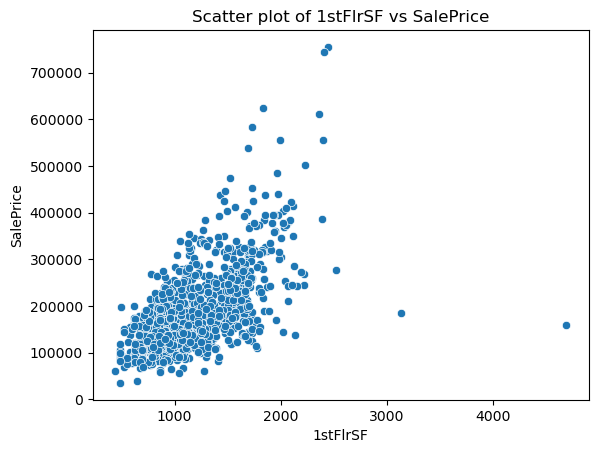

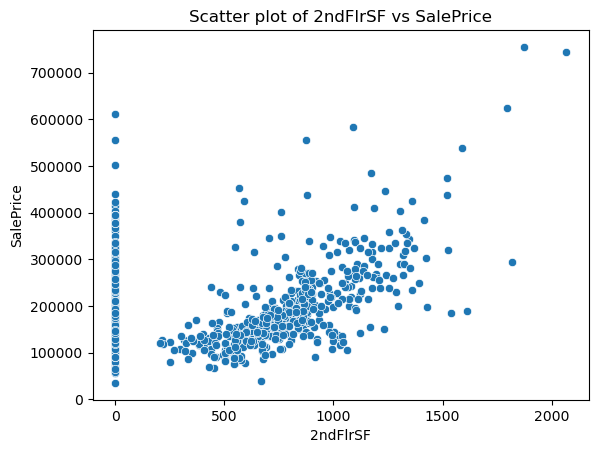

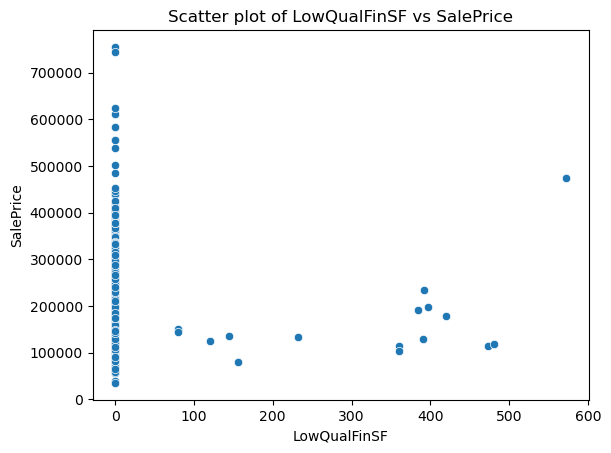

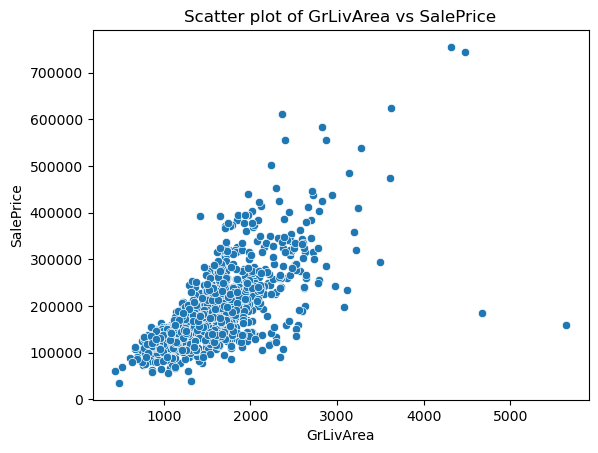

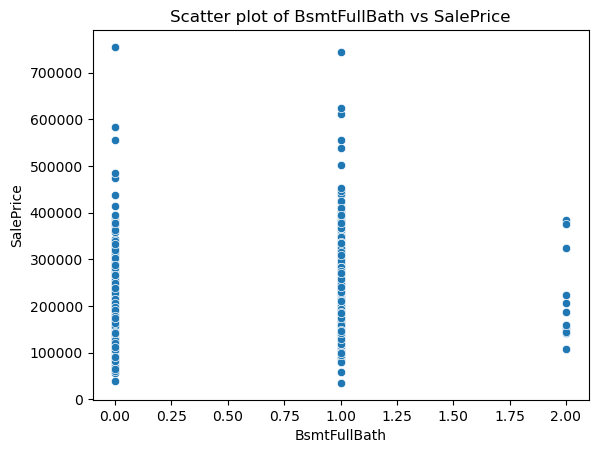

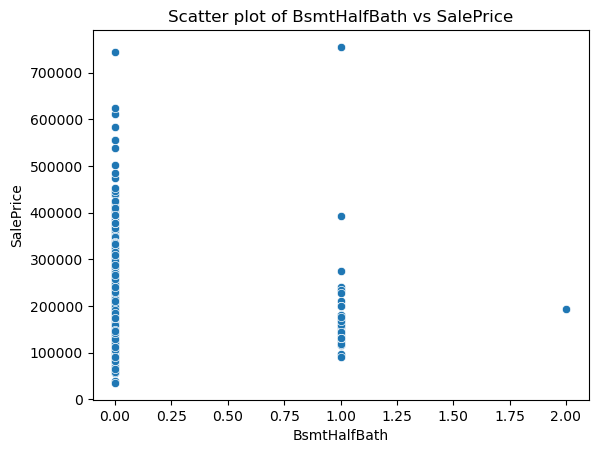

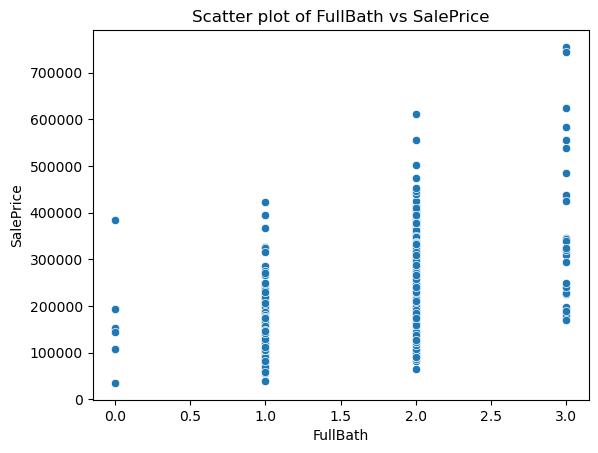

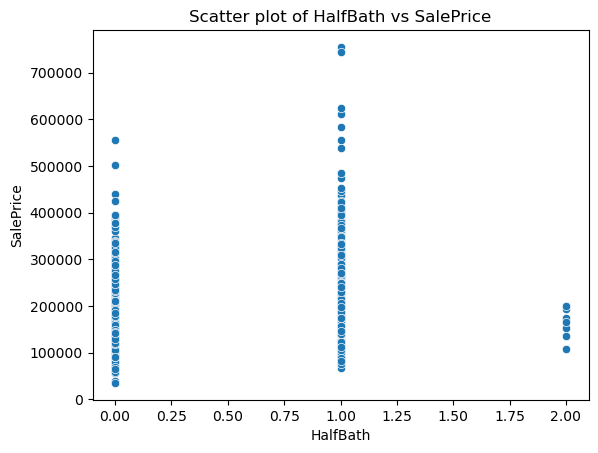

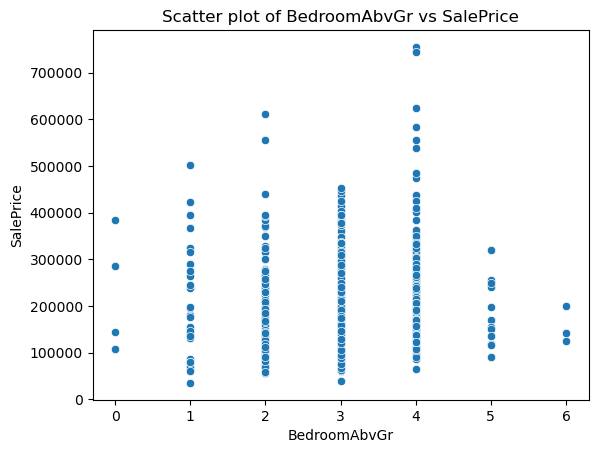

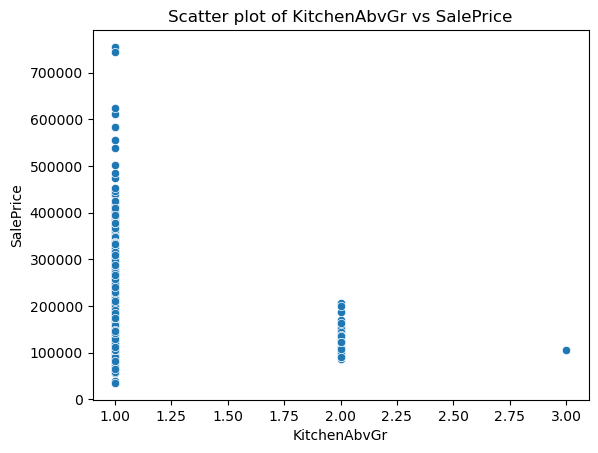

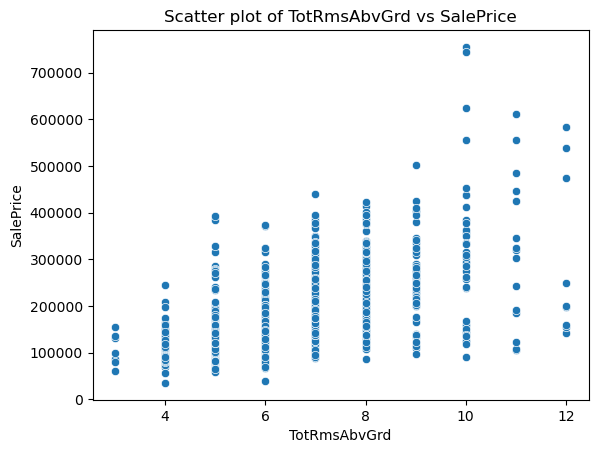

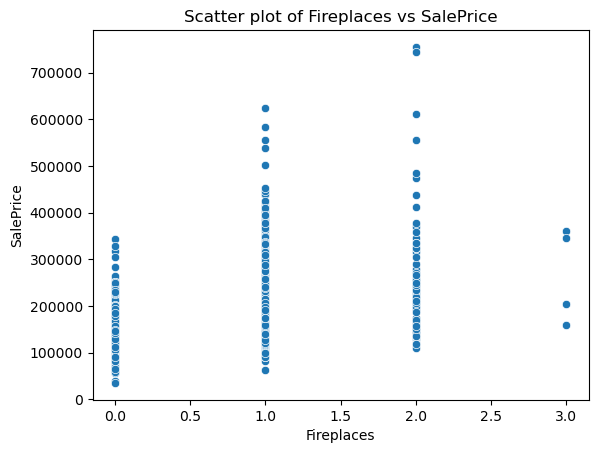

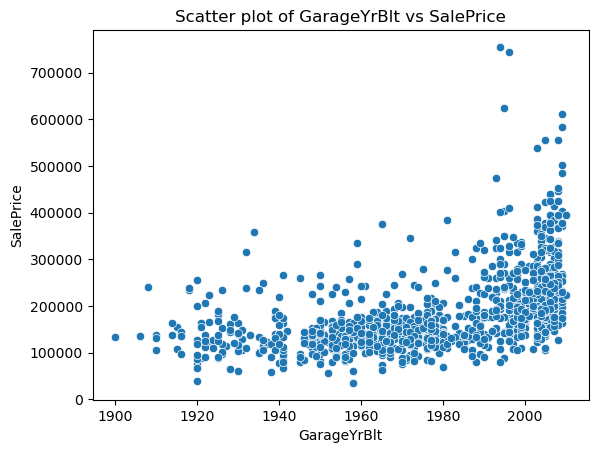

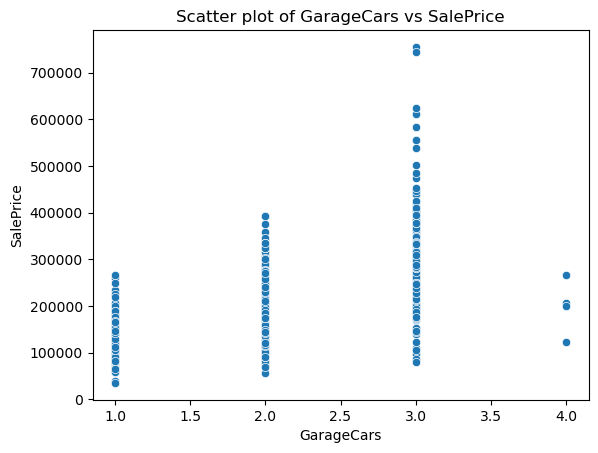

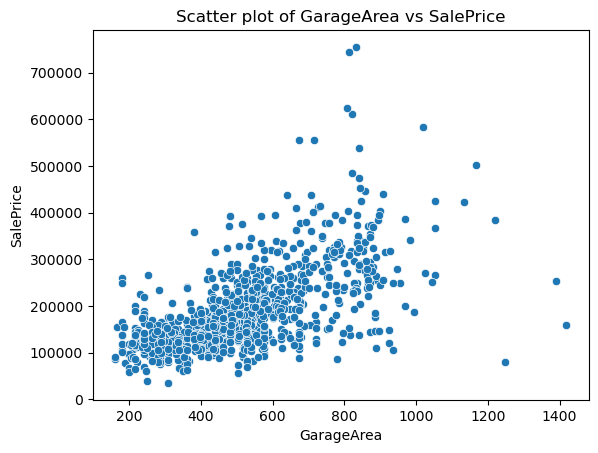

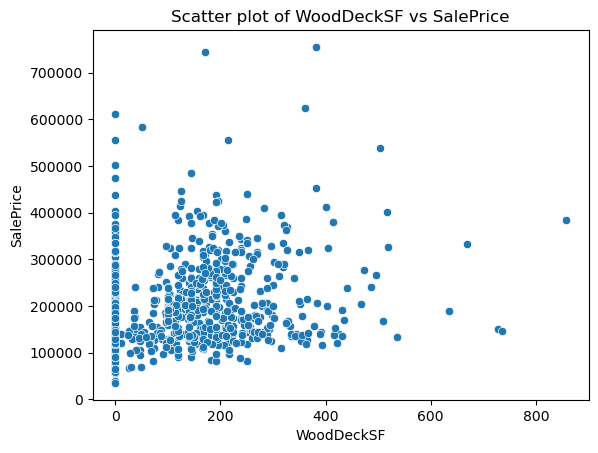

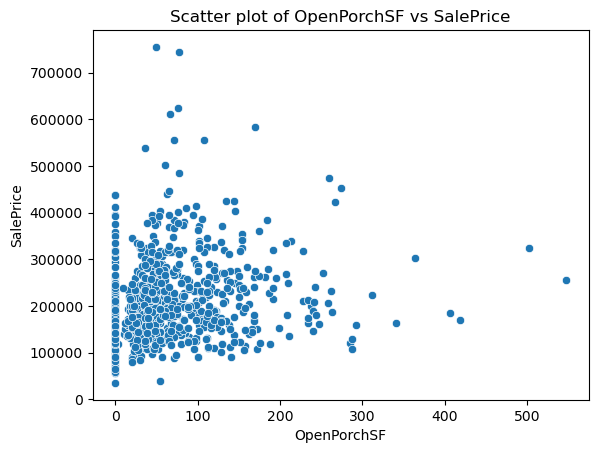

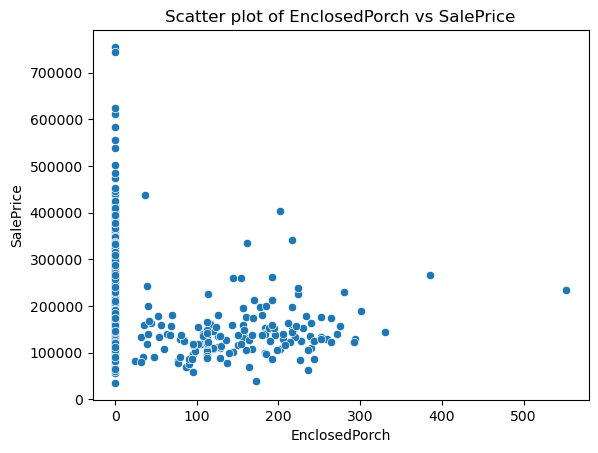

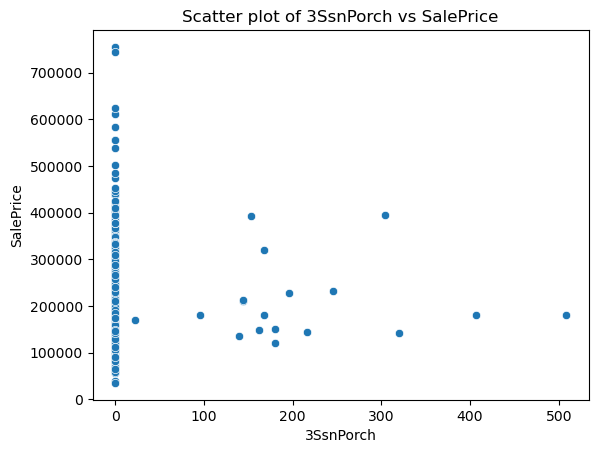

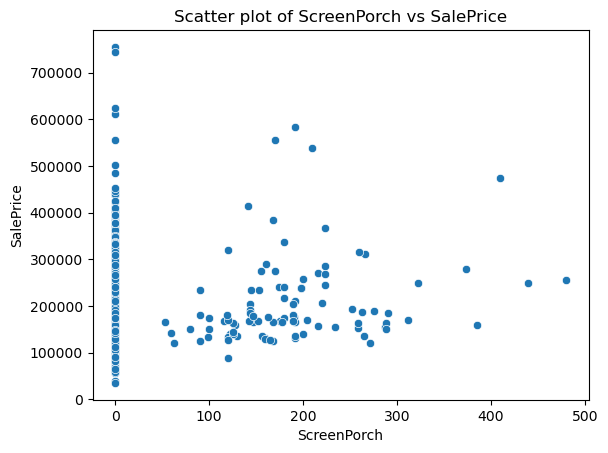

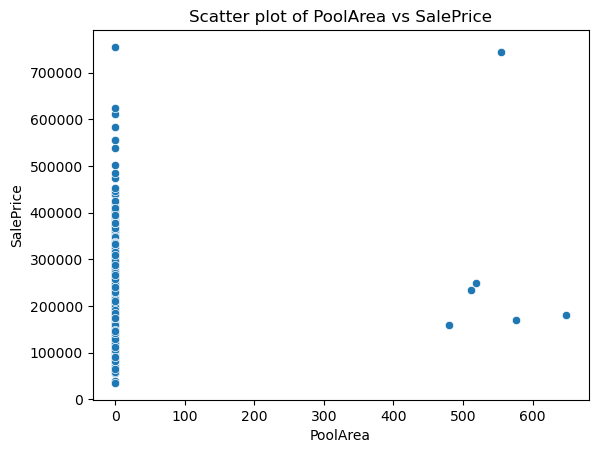

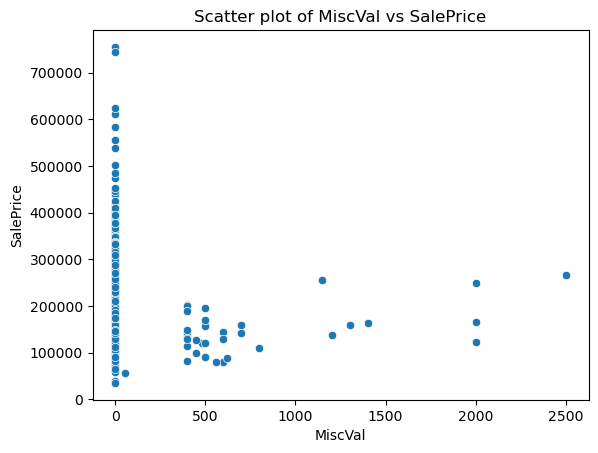

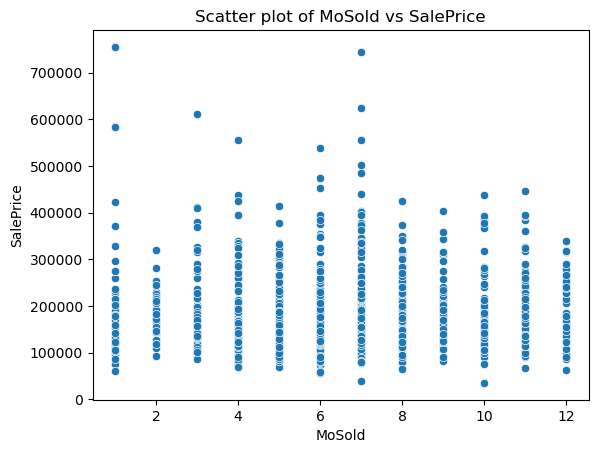

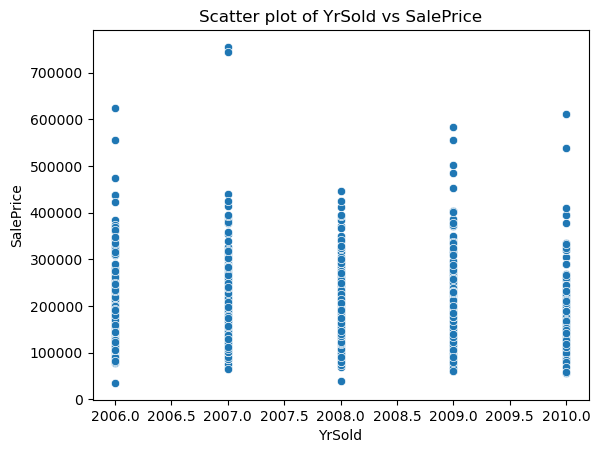

In [37]:
for column in df.columns[:-1]:
    sns.scatterplot(x=df[column], y=df['SalePrice'])
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.title(f'Scatter plot of {column} vs SalePrice')
    plt.show()

# Correlarion Matrix

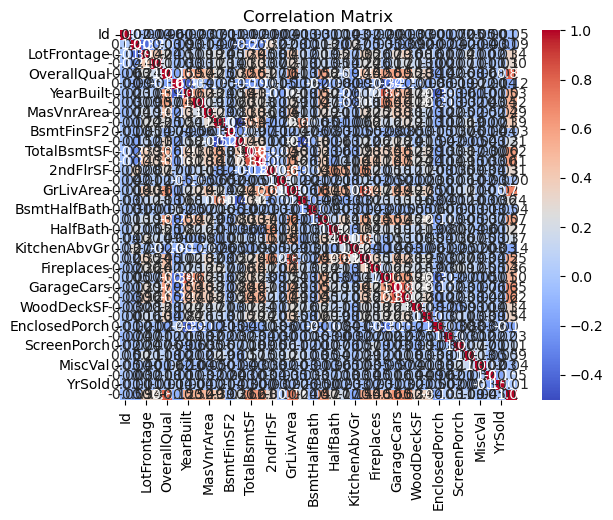

In [38]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [39]:
print(df.isnull().sum())

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


# Linear Regression

In [40]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
X_std = scaler.fit_transform(X)

In [41]:
#Build a Data Model
model = LinearRegression(fit_intercept=True)
#model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [42]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1591724600.58
R-squared: 0.80


# Random forest

In [43]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1918195547.30
R-squared: 0.76


# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [46]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1953858995.95
R-squared: 0.75


# Hyper Parameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

ValueError: Invalid parameter 'max_depth' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].